In [1]:
!pip install word2number


In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n
from tqdm import tqdm
from IPython.display import Markdown
import ast
import re

In [3]:
airbnb = pd.read_excel('Airbnb_Data.xlsx')

In [10]:
airbnb.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,6017649,https://www.airbnb.com/rooms/6017649,20170402075052,2017-04-02,Nice room at Vondelpark,Nice and clean private bedroom near the city c...,"I offer a cuzy, private room in a nice apartme...",Nice and clean private bedroom near the city c...,none,Really nice and quiet nighborhood!,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1,0.13,"52.35992696894107, 4.862859671199358",Host Has Profile Pic
1,9192415,https://www.airbnb.com/rooms/9192415,20170402075052,2017-04-02,Cozy apartment center Amsterdam,Cozy 2 person apartment in Amsterdam on walkin...,"The appartment has a living room, a kitchen, a...",Cozy 2 person apartment in Amsterdam on walkin...,none,This is an apartment situated at the West side...,...,10.0,10.0,10.0,NaN,Amsterdam,moderate,1,0.99,"52.36137101269532, 4.8738603256015365","Host Is Superhost, Host Has Profile Pic, Host ..."
2,743788,https://www.airbnb.com/rooms/743788,20170402075052,2017-04-02,Le Quartier Sonang-Kamar Bidadari,"‘Le Quartier Sonang’ is a peaceful, quiet town...",We opened our doors on the 25th of April 2012 ...,"‘Le Quartier Sonang’ is a peaceful, quiet town...",none,NaN,...,NaN,NaN,NaN,NaN,Amsterdam,strict,2,NaN,"52.36456756846072, 4.875639539930118","Host Has Profile Pic, Is Location Exact"
3,13153299,https://www.airbnb.com/rooms/13153299,20170402075052,2017-04-02,Trendy and spacious rooftop apt (115m2) in centre,A beautiful 2 bedroom apt (115 m2) with a an a...,This spacious top floor apartment is completel...,A beautiful 2 bedroom apt (115 m2) with a an a...,none,Seriously one of the best neighbourhoods in to...,...,10.0,10.0,10.0,NaN,Amsterdam,strict,1,0.11,"52.36464636933365, 4.8740486118580595","Host Has Profile Pic, Host Identity Verified, ..."
4,277011,https://www.airbnb.com/rooms/277011,20170402075052,2017-04-02,nice apartment in centre amsterdam,NaN,This beautiful apartment has a spacious living...,This beautiful apartment has a spacious living...,none,NaN,...,9.0,10.0,10.0,NaN,Amsterdam,strict,1,0.21,"52.358295084395394, 4.859091947726598","Host Has Profile Pic, Is Location Exact, Insta..."


In [11]:
airbnb.tail(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
123056,4749982,https://www.airbnb.com/rooms/4749982,20170507222235,2017-05-08,Appartamento zona Wedding,Questo elegante appartamento si trova nel quar...,Questo elegante appartamento si trova nel quar...,Questo elegante appartamento si trova nel quar...,none,NaN,...,9.0,9.0,8.0,NaN,NaN,moderate,1,0.11,"52.56321787546623, 13.341142634091602","Host Has Profile Pic, Host Identity Verified"
123057,16822451,https://www.airbnb.com/rooms/16822451,20170507222235,2017-05-08,Lovely apartment very close to airport Tegel,Wir bieten euch ein privates Zimmer im Wedding...,Our apartment is a typical old Berlin building...,Wir bieten euch ein privates Zimmer im Wedding...,none,Eure Unterkunft liegt im aufblühenden Bezirk W...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,1.48,"52.55074301180134, 13.341502220777464","Host Has Profile Pic, Host Identity Verified, ..."
123058,17998459,https://www.airbnb.com/rooms/17998459,20170507222235,2017-05-08,Amazing Room in the heart of Europe (Berlin) ❤,Big and bright room located in one of the be...,NaN,Big and bright room located in one of the be...,none,NaN,...,10.0,6.0,10.0,NaN,NaN,flexible,2,1.00,"52.54336392177602, 13.349605682371372","Host Has Profile Pic, Host Identity Verified, ..."
123059,17518182,https://www.airbnb.com/rooms/17518182,20170507222235,2017-05-08,"Well-connected, clean, private room in Wedding.",The flat is well connected to local amenities ...,NaN,The flat is well connected to local amenities ...,none,NaN,...,10.0,10.0,10.0,NaN,NaN,flexible,2,2.61,"52.55055095494175, 13.339338333168671","Host Has Profile Pic, Host Identity Verified, ..."
123060,10562264,https://www.airbnb.com/rooms/10562264,20170507222235,2017-05-08,colour your life in Berlin.,"Hello, do you want to spend a couple of days i...",NaN,"Hello, do you want to spend a couple of days i...",none,NaN,...,9.0,9.0,9.0,NaN,NaN,strict,2,2.29,"52.496640731018566, 13.419353545622492","Host Has Profile Pic, Host Identity Verified, ..."


In [12]:
airbnb.shape

(123061, 89)

In [13]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123061 entries, 0 to 123060
Data columns (total 89 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              123061 non-null  int64  
 1   Listing Url                     123061 non-null  object 
 2   Scrape ID                       123061 non-null  int64  
 3   Last Scraped                    123061 non-null  object 
 4   Name                            122765 non-null  object 
 5   Summary                         118788 non-null  object 
 6   Space                           81580 non-null   object 
 7   Description                     123008 non-null  object 
 8   Experiences Offered             123061 non-null  object 
 9   Neighborhood Overview           67962 non-null   object 
 10  Notes                           42604 non-null   object 
 11  Transit                         73860 non-null   object 
 12  Access          

In [14]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,123061.0,9.969413e+06,5.362922e+06,1.419000e+03,5.700239e+06,1.005298e+07,1.443753e+07,1.929175e+07
Scrape ID,123061.0,2.016895e+13,3.596497e+09,2.016050e+13,2.017040e+13,2.017051e+13,2.017060e+13,2.017062e+13
Host ID,123061.0,3.347050e+07,3.202267e+07,5.440000e+02,7.790017e+06,2.314373e+07,4.870338e+07,1.350885e+08
Host Response Rate,91573.0,9.288330e+01,1.792511e+01,0.000000e+00,9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,123009.0,3.672154e+00,1.504505e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.690000e+02
Host Total Listings Count,123009.0,3.672154e+00,1.504505e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.690000e+02
Latitude,123061.0,4.863917e+01,7.651332e+00,2.218611e+01,4.552602e+01,5.234817e+01,5.254047e+01,5.573384e+01
Longitude,123061.0,-8.225631e+00,5.095608e+01,-1.232187e+02,-7.116628e+01,6.146902e+00,1.341222e+01,1.143138e+02
Accommodates,123061.0,3.054713e+00,1.788592e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.700000e+01
Bathrooms,122747.0,1.143356e+00,4.376800e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [15]:
airbnb.isnull().any()

ID                                False
Listing Url                       False
Scrape ID                         False
Last Scraped                      False
Name                               True
                                  ...  
Cancellation Policy               False
Calculated host listings count    False
Reviews per Month                  True
Geolocation                       False
Features                           True
Length: 89, dtype: bool

In [16]:
airbnb.isnull().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                296
                                  ...  
Cancellation Policy                   0
Calculated host listings count        0
Reviews per Month                 26579
Geolocation                           0
Features                             86
Length: 89, dtype: int64

In [17]:
null_columns=airbnb.columns[airbnb.isnull().any()]
airbnb[null_columns].isnull().sum()*100/len(airbnb)

Name                              0.240531
Summary                           3.472262
Space                            33.707673
Description                       0.043068
Neighborhood Overview            44.773730
Notes                            65.379771
Transit                          39.980985
Access                           51.048667
Interaction                      53.287394
House Rules                      45.424627
Thumbnail Url                    20.166422
Medium Url                       20.166422
Picture Url                       0.177148
XL Picture Url                   20.166422
Host Name                         0.042255
Host Since                        0.042255
Host Location                     0.420929
Host About                       43.952186
Host Response Time               25.587310
Host Response Rate               25.587310
Host Acceptance Rate             88.441505
Host Thumbnail Url                0.042255
Host Picture Url                  0.042255
Host Neighb

In [18]:
list(airbnb['Bed Type'].unique())

['Real Bed', 'Pull-out Sofa', 'Couch', 'Futon', 'Airbed']

In [19]:
columns_to_drop = [
    'Listing Url', 'Scrape ID', 'Summary', 'Name', 'Space', 'Neighborhood Overview', 'Description', 'Notes', 'Has Availability', 
    'Thumbnail Url', 'Medium Url', 'Picture Url','XL Picture Url', 'Market', 'Host URL', 'Host Thumbnail Url', 'Host Neighbourhood', 
    'Host Picture Url', 'Geolocation', 'Jurisdiction Names', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'Country Code'
]

airbnb.drop(columns=columns_to_drop, inplace=True)

In [20]:
# --- List all remaining columns with serial numbers ---
print(f"Total columns after drop: {len(airbnb.columns)}\n")

for i, col in enumerate(airbnb.columns, 1):
    print(f"{i}. {col}")

Total columns after drop: 66

1. ID
2. Last Scraped
3. Experiences Offered
4. Transit
5. Access
6. Interaction
7. House Rules
8. Host ID
9. Host Name
10. Host Since
11. Host Location
12. Host About
13. Host Response Time
14. Host Response Rate
15. Host Acceptance Rate
16. Host Listings Count
17. Host Total Listings Count
18. Host Verifications
19. Street
20. Neighbourhood Cleansed
21. City
22. State
23. Zipcode
24. Smart Location
25. Country
26. Latitude
27. Longitude
28. Property Type
29. Room Type
30. Accommodates
31. Bathrooms
32. Bedrooms
33. Beds
34. Bed Type
35. Amenities
36. Square Feet
37. Price
38. Weekly Price
39. Monthly Price
40. Security Deposit
41. Cleaning Fee
42. Guests Included
43. Extra People
44. Minimum Nights
45. Maximum Nights
46. Calendar Updated
47. Availability 30
48. Availability 60
49. Availability 90
50. Availability 365
51. Calendar last Scraped
52. Number of Reviews
53. First Review
54. Last Review
55. Review Scores Rating
56. Review Scores Accuracy
57. Re

In [21]:
for i, col in enumerate(airbnb.columns[airbnb.dtypes == "float64"], start=1):
    print(f"{i}. {col}")

1. Host Response Rate
2. Host Listings Count
3. Host Total Listings Count
4. Latitude
5. Longitude
6. Bathrooms
7. Bedrooms
8. Beds
9. Square Feet
10. Price
11. Weekly Price
12. Monthly Price
13. Security Deposit
14. Cleaning Fee
15. Extra People
16. Review Scores Rating
17. Review Scores Accuracy
18. Review Scores Cleanliness
19. Review Scores Checkin
20. Review Scores Communication
21. Review Scores Location
22. Review Scores Value
23. Reviews per Month


In [22]:
for i, col in enumerate(airbnb.columns[airbnb.dtypes == "object"], start=1):
    print(f"{i}. {col}")

1. Last Scraped
2. Experiences Offered
3. Transit
4. Access
5. Interaction
6. House Rules
7. Host Name
8. Host Since
9. Host Location
10. Host About
11. Host Response Time
12. Host Acceptance Rate
13. Host Verifications
14. Street
15. Neighbourhood Cleansed
16. City
17. State
18. Zipcode
19. Smart Location
20. Country
21. Property Type
22. Room Type
23. Bed Type
24. Amenities
25. Calendar Updated
26. Calendar last Scraped
27. First Review
28. Last Review
29. License
30. Cancellation Policy
31. Features


In [23]:
for i, col in enumerate(airbnb.columns[(airbnb.dtypes == "int64") | (airbnb.dtypes == "int32")], start=1):
    print(f"{i}. {col}")

1. ID
2. Host ID
3. Accommodates
4. Guests Included
5. Minimum Nights
6. Maximum Nights
7. Availability 30
8. Availability 60
9. Availability 90
10. Availability 365
11. Number of Reviews
12. Calculated host listings count


In [28]:
airbnb_copy = airbnb.copy()

In [ ]:
--------------------------------------------------------

# 1. Host Name

In [5]:
# --- Step 1: Check missing values before cleaning ---
print("no. of missing null values (before):", airbnb["Host Name"].isnull().sum())

# --- Step 2: Remove leading/trailing spaces ---
airbnb["Host Name"] = airbnb["Host Name"].astype(str).str.strip()

# --- Step 3: Replace empty strings, 'nan'-like, and missing rows with 'No Name Provided' ---
airbnb["Host Name"].replace(["", " ", "nan", "NaN", "None"], "No Name Provided", inplace=True)
airbnb["Host Name"].fillna("No Name Provided", inplace=True)

# --- Step 4: Capitalize properly (e.g., JOHN SMITH -> John Smith) ---
airbnb["Host Name"] = airbnb["Host Name"].apply(
    lambda x: x.title() if isinstance(x, str) else x
)

# --- Step 5: Check missing values after cleaning ---
print("no. of missing null values (after):", airbnb["Host Name"].isnull().sum())

# --- Step 6: Show sample cleaned values ---
print("\nSample cleaned Host Name values:")
print(airbnb["Host Name"].head(10))

no. of missing null values (before): 52
no. of missing null values (after): 0

Sample cleaned Host Name values:
0          Linda
1        Annabel
2    Oki & Frank
3     Jan Willem
4            Eva
5         Raquel
6          Pollo
7    Robin&Thaís
8          Sanne
9        Claudia
Name: Host Name, dtype: object


In [ ]:
# --- Host Name Column Cleaning ---
# 1. Printed the count of null values to check the state before cleaning.
# 2. Converted the column to a string type and removed any leading or trailing whitespace.
# 3. Replaced various forms of "missing" text (like "nan", "None", or empty strings) with "Unknown".
# 4. Filled any remaining actual null (NaN) values with "Unknown".
# 5. Standardized the capitalization for all names to Title Case (e.g., "john" -> "John").
# 6. Printed the final null count (which should be 0) and a sample to verify the changes.

In [ ]:
-----------------------------------------------------------------------

 # 2. Host ID

In [6]:
# --- Step 1: Check missing BEFORE cleaning ---
print("no. of missing null values (before):", airbnb["Host ID"].isna().sum())

# --- Step 2: Convert to string & trim spaces ---
airbnb["Host ID"] = airbnb["Host ID"].astype(str).str.strip()

# --- Step 3: Clean Host ID (keep only valid alphanumeric IDs, others → NaN) ---
airbnb["Host ID"] = airbnb["Host ID"].apply(
    lambda x: x if re.match(r'^[A-Za-z0-9]+$', x) else np.nan
)

# --- Step 4: Check missing AFTER cleaning ---
print("no. of missing null values (after):", airbnb["Host ID"].isna().sum())

# --- Step 5: Preview cleaned Host ID column ---
print("\nSample cleaned Host ID values:")
print(airbnb["Host ID"].head(10))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned Host ID values:
0     1195000
1    47820987
2     3897376
3    17633423
4     1446698
5    36775877
6    15625753
7    14694975
8    25049789
9    40565986
Name: Host ID, dtype: object


In [ ]:
----------------------------------------------------------------

# 3. Experiences Offered

In [7]:
print("no. of missing null values (before):", airbnb["Experiences Offered"].isna().sum())

# --- Step 1: Normalize raw values ---
airbnb["Experiences Offered"] = airbnb["Experiences Offered"].astype(str).str.lower().str.strip()
airbnb.loc[airbnb["Experiences Offered"].isin(["", "nan", "none", "null", "na"]), "Experiences Offered"] = np.nan

# --- Step 2: Imputation based on House Rules, Access & Interaction ---
def impute_experience(row):
    rule = str(row.get("House Rules", "")).lower()
    access = str(row.get("Access", "")).lower()
    interact = str(row.get("Interaction", "")).lower()

    # BUSINESS — strict rules, limited access, non-interactive
    if ("quiet" in rule or "noise" in rule or "guest" in rule or 
        "clean" in rule or "limit" in rule) and \
        ("shared" in access or "non" in interact):
        return "Business"

    # FAMILY — family-friendly, safe, full access
    if "family" in rule or "kid" in rule or "child" in rule or "full" in access:
        return "Family"

    # ROMANTIC — quiet, cozy, private, relaxing
    if "privacy" in rule or "relax" in rule or "romantic" in rule:
        return "Romantic"

    # SOCIAL — interactive host or welcoming / community vibe
    if "interactive" in interact or "social" in rule or "welcome" in rule:
        return "Social"

    # DEFAULT
    return "Social"

# Apply only to missing values
airbnb["Experiences Offered"] = airbnb.apply(
    lambda r: impute_experience(r) if pd.isna(r["Experiences Offered"]) else r["Experiences Offered"],
    axis=1
)

# --- Step 3: Capitalize first letter (standardize formatting) ---
airbnb["Experiences Offered"] = airbnb["Experiences Offered"].astype(str).str.title()

# --- Step 4: Validation ---
print("no. of missing null values (after):", airbnb["Experiences Offered"].isna().sum())
print("\nValue Counts After Imputation:")
print(airbnb["Experiences Offered"].value_counts())

no. of missing null values (before): 0
no. of missing null values (after): 0

Value Counts After Imputation:
Experiences Offered
Social      109854
Family        9970
Business      2154
Romantic      1083
Name: count, dtype: int64


In [ ]:
---------------------------------------------------------

# 4 Interaction

In [8]:

# --- Step 1: Normalize text ---
airbnb["Interaction"] = airbnb["Interaction"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Non-interactive keywords ---
non_interactive_keywords = [
    'no contact', 'not present', 'not around', 'won’t be', 'will not be',
    'privacy', 'independent', 'self service', 'self-service', 'alone', 'on your own',
    'entirely to yourself', 'all to yourself', 'total privacy', 'absolute privacy',
    'limited interaction', 'minimal', 'rarely', 'seldom', 'not often'
]

# --- Step 3: Classifier ---
def classify_interaction(text):
    # If blank or missing → Interactive Host (default opposite of non-interactive)
    if text == "":
        return "Interactive Host"
    
    # If any non-interactive keyword appears → Non-Interactive Host
    if any(k in text for k in non_interactive_keywords):
        return "Non-Interactive Host"
    
    # Otherwise → Interactive
    return "Interactive Host"

# --- Step 4: Apply & overwrite original column ---
airbnb["Interaction"] = airbnb["Interaction"].apply(classify_interaction)

# --- Step 5: Validate ---
print(airbnb["Interaction"].value_counts())
print("\nUnique values:", airbnb["Interaction"].unique())

Interaction
Interactive Host        118239
Non-Interactive Host      4822
Name: count, dtype: int64

Unique values: ['Interactive Host' 'Non-Interactive Host']


In [ ]:
# --- 'Interaction' Column Cleaning Explanation ---
#
# 1. Normalize Text:
#    - First, we fill any actual 'NaN' values with an empty string ("").
#    - We then convert the entire column to lowercase and remove all leading/trailing whitespace
#      to ensure the keyword search works consistently (e.g., " Privacy" becomes "privacy").
#
# 2. Create Keyword List:
#    - We define a list 'non_interactive_keywords' containing words or phrases that
#      explicitly suggest the host has minimal contact with guests (e.g., "privacy", "self check-in").
#
# 3. Classify with a Function:
#    - We create a function 'classify_interaction' that is applied to every row.
#    - LOGIC: We assume a host IS "Interactive" by default.
#    - If the description is empty, it defaults to "Interactive Host".
#    - The code then *only* searches for the 'non_interactive_keywords'.
#    - If it finds *any* of those keywords, it flags the host as "Non-Interactive Host".
#    - If the text is not empty and contains no non-interactive words, it's also classified
#      as the default "Interactive Host".
#
# 4. Apply and Validate:
#    - We use .apply() to run this function on every row, overwriting the old column.
#    - Finally, .value_counts() is used to confirm the two new categories.

In [ ]:
------------------------------------------------------------------------------

# 5 Host About

In [9]:
# --- Step 1: Normalize text ---
airbnb["Host About"] = airbnb["Host About"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Strong Professional Keywords Only (to avoid false positives) ---
professional_keywords = [
    'property manager', 'property management', 'management company', 'rental agency',
    'vacation rental company', 'hospitality company', 'real estate',
    'professional host', 'corporate', 'agency', 'team', 'company', 'business',
    'managed by', 'hosted by team', 'hospitality', 'serviced apartment'
]

def classify_host(text):
    # no description → assume individual host
    if text == "" or text in ['.', '..', '...', '0', '-', 'na', 'n/a', 'later']:
        return "Not Professional Host"
    
    # Check professional signals
    if any(keyword in text for keyword in professional_keywords):
        return "Professional Host"
    
    return "Not Professional Host"

# --- Step 3: Overwrite column with classification ---
airbnb["Host About"] = airbnb["Host About"].apply(classify_host)

# --- Step 4: Validate ---
print(airbnb["Host About"].value_counts())
print("\nUnique values:", airbnb["Host About"].unique())

Host About
Not Professional Host    115590
Professional Host          7471
Name: count, dtype: int64

Unique values: ['Not Professional Host' 'Professional Host']


In [ ]:
----------------------------------------------------

# 6 Transit

In [10]:
# --- Step 1: Normalize text ---
airbnb["Transit"] = airbnb["Transit"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Limited Transportation keywords ---
limited_keywords = [
    'far from', 'distance from', 'need to walk', 'have to walk', 'quite far',
    'not close', 'limited transport', 'few options', 'only one', 'single line',
    'remote', 'outskirts', 'suburban', 'requires transfer', 'need to change',
    'challenging', 'difficult to find', 'limited parking', 'no public transport'
]

# --- Step 3: Accessible Transportation keywords ---
accessible_keywords = [
    'metro', 'tram', 'bus', 'train', 'subway', 'underground',
    'station', 'transport', 'connection', 'connected', 'public transport',
    'walking distance', 'walkable', 'few minutes walk', 'close to', 'near',
    'easy access', 'well connected', 'great access', 'good connection'
]

# --- Step 4: Classifier (Updated with new names) ---
def classify_transit(text):
    # If empty → Default to "Poor Transit Access"
    if text == "":
        return "Poor Transit Access"
    
    limited_count = sum(k in text for k in limited_keywords)
    accessible_count = sum(k in text for k in accessible_keywords)

    if accessible_count > limited_count:
        return "Transit-Friendly"
    elif limited_count > accessible_count:
        return "Poor Transit Access"
    else:
        # If counts are equal or only limited keywords are found, default to poor access
        return "Poor Transit Access"

# --- Step 5: Apply classification and overwrite column ---
airbnb["Transit"] = airbnb["Transit"].apply(classify_transit)

# --- Step 6: Validate ---
print(airbnb["Transit"].value_counts())
print("\nUnique values:", airbnb["Transit"].unique())

Transit
Transit-Friendly       68284
Poor Transit Access    54777
Name: count, dtype: int64

Unique values: ['Transit-Friendly' 'Poor Transit Access']


In [34]:
# --- 'Transit' Column Cleaning Explanation ---
#
# 1. Normalize Text:
#    - First, we fill any actual 'NaN' values with an empty string ("").
#    - We then convert the entire column to lowercase and remove all leading/trailing whitespace
#      to ensure the keyword search works consistently (e.g., "Close To" becomes "close to").
#
# 2. Create Two Keyword Lists:
#    - We created 'limited_keywords' (e.g., "far from", "need to walk")
#    - We also created 'accessible_keywords' (e.g., "metro", "close to", "bus station")
#
# 3. Classify with a "Scoring" Function:
#    - This function is more advanced. It "scores" the description.
#    - It counts how many times any 'limited_' keyword appears.
#    - It counts how many times any 'accessible_' keyword appears.
#
# 4. Compare the Scores:
#    - If a description is empty, it defaults to "Limited Transportation" (a safe assumption).
#    - If 'accessible_count' is higher than 'limited_count', it's classified as "Accessible".
#    - If 'limited_count' is higher (or if the scores are equal), it's classified as "Limited".
#
# 5. Apply and Validate:
#    - We use .apply() to run this scoring function on every row.
#    - This turns the free-text into one of two clear categories for analysis.

In [ ]:
---------------------------------------------------------------------------------------------

# 7 ID

In [11]:
# --- Step 1: Check missing values ---
print("Missing IDs before:", airbnb["ID"].isna().sum())

# --- Step 2: Convert to integer ---
airbnb["ID"] = pd.to_numeric(airbnb["ID"], errors="coerce", downcast="integer")

# --- Step 3: Drop invalid IDs (<= 0) ---
airbnb = airbnb[airbnb["ID"] > 0]

# --- Step 4: Drop duplicate IDs ---
airbnb = airbnb.drop_duplicates(subset=["ID"], keep="first")

# --- Step 5: Check results ---
print("Missing IDs after:", airbnb["ID"].isna().sum())
print("Duplicate IDs after:", airbnb.duplicated(subset=["ID"]).sum())
print("Total rows after cleaning:", len(airbnb))

Missing IDs before: 0
Missing IDs after: 0
Duplicate IDs after: 0
Total rows after cleaning: 123061


In [ ]:
-----------------------------------------------------------------------------

# 8 License

In [12]:
import re  # Added import for 're.search()'

# --- Step 1: Normalize text ---
airbnb["License"] = airbnb["License"].fillna("").astype(str).str.strip()

# --- Step 2: Define classification (Updated with new names) ---
def classify_license(x):
    txt = x.lower().strip()
    
    # Consider as NOT provided
    if txt in ["", "nan", "none", "n/a", "na", "-", "--", "#", "not available", "no license"]:
        return "License Missing"  # <-- Changed
    
    # Keywords suggesting license in progress = treat as Provided
    pending_keywords = ["under review", "new entry", "applied", "pending"]
    if any(k in txt for k in pending_keywords):
        return "Licensed"  # <-- Changed
    
    # Detect common License/Tax/EOT patterns → Provided
    # E.g. numbers, Greek AFM, EOT, EL codes, VAT, registration numbers
    if (
        re.search(r"\b\d{6,}\b", txt) or      # numbers with 6+ digits
        "eot" in txt or
        "mhte" in txt or
        "afm" in txt or "αφμ" in txt or      # Greek AFM
        "vat" in txt or
        "license" in txt or
        "permit" in txt or
        "registration" in txt or
        "el" in txt                      # e.g., EL123456
    ):
        return "Licensed"  # <-- Changed
    
    # Default fallback
    return "License Missing"  # <-- Changed

# --- Step 3: Apply classification ---
airbnb["License"] = airbnb["License"].apply(classify_license)

# --- Step 4: Validate ---
print(airbnb["License"].value_counts())
print("\nUnique values:", airbnb["License"].unique())

License
License Missing    123022
Licensed               39
Name: count, dtype: int64

Unique values: ['License Missing' 'Licensed']


In [ ]:
---------------------------------------------------------------------  

# 9. Access

In [13]:
# --- Step 1: Normalize text ---
airbnb["Access"] = airbnb["Access"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Define keyword sets ---
# Full private access → guest has entire place
full_keywords = [
    'entire place', 'whole apartment', 'whole house', 'entire house',
    'entire flat', 'full access', 'whole space', 'all areas', 'entire property',
    'private apartment', 'private house', 'no sharing', 'exclusive use',
    'for you alone', 'for your use only', 'only you', 'yours during stay'
]

# Shared access → shared with host or others
shared_keywords = [
    'shared', 'share', 'common area', 'host lives', 'other guests',
    'with me', 'with us', 'with host', 'with owner', 'private room',
    'shared bathroom', 'shared kitchen', 'shared space', 'not entire place',
    'part of the house', 'one room', 'except one room'
]

# --- Step 3: Classifier (Updated with new names) ---
def classify_access(text):
    if text == "":
        return "Shared Space"   # <-- Changed name (if unclear → assume shared)
    
    full_count = sum(k in text for k in full_keywords)
    shared_count = sum(k in text for k in shared_keywords)

    if full_count > shared_count:
        return "Entire Place"  # <-- Changed name
    elif shared_count > full_count:
        return "Shared Space"  # <-- Changed name
    else:
        # Default if ambiguous
        return "Shared Space"  # <-- Changed name

# --- Step 4: Apply & overwrite column ---
airbnb["Access"] = airbnb["Access"].apply(classify_access)

# --- Step 5: Validate output ---
print(airbnb["Access"].value_counts())
print("\nUnique values:", airbnb["Access"].unique())

Access
Shared Space    116254
Entire Place      6807
Name: count, dtype: int64

Unique values: ['Shared Space' 'Entire Place']


In [ ]:
---------------------------------------------------------------------

# 10. House Rules

In [14]:
# --- Step 1: Normalize House Rules text ---
airbnb["House Rules"] = airbnb["House Rules"].fillna("").astype(str).str.lower().str.strip()

# --- Step 2: Keyword dictionaries for each category ---
noise_kw = ['noise', 'quiet', 'neighbour', 'neighbor', 'loud', 'music', 'silence', 'night', 'midnight', '22:00', '23:00']
smoke_kw = ['smoking', 'smoke', 'cigarette', 'tobacco', 'weed', 'cannabis', 'drug']
clean_kw = ['clean', 'tidy', 'damage', 'break', 'careful', 'respect property', 'wash', 'dishes', 'mess']
guest_kw = ['party', 'parties', 'guest', 'visitor', 'people', 'extra', 'overnight', 'invite']
general_kw = ['enjoy', 'welcome', 'feel at home', 'happy', 'comfortable', 'respect', 'thank you']

# --- Step 3: Categorize into Option C 5 Groups (Updated Names) ---
def classify_house_rule(text):
    if text == "" or text in ["none", "n/a", "no rules"]:
        return "Standard Policy"  # <-- Changed
    
    t = text.lower()

    if any(k in t for k in noise_kw):
        return "Noise & Quiet Hours"  # <-- Changed
    if any(k in t for k in smoke_kw):
        return "Smoking & Substances Policy"  # <-- Changed
    if any(k in t for k in clean_kw):
        return "Cleaning & Property Care"  # <-- Changed
    if any(k in t for k in guest_kw):
        return "Guest & Party Policy"  # <-- Changed
    
    return "Standard Policy"  # <-- Changed

# --- Step 4: Apply classification (overwrite column) ---
airbnb["House Rules"] = airbnb["House Rules"].apply(classify_house_rule)

# --- Step 5: Validate result ---
print(airbnb["House Rules"].value_counts())
print("\nUnique categories:", airbnb["House Rules"].unique())

House Rules
Standard Policy                70295
Noise & Quiet Hours            28007
Smoking & Substances Policy    17748
Guest & Party Policy            3723
Cleaning & Property Care        3288
Name: count, dtype: int64

Unique categories: ['Standard Policy' 'Noise & Quiet Hours' 'Smoking & Substances Policy'
 'Cleaning & Property Care' 'Guest & Party Policy']


In [ ]:
------------------------------------------------------------------------------------------------

# 11 Host Verification

In [15]:
# =============================================================================
# CLEAN HOST VERIFICATIONS - WITH YES/NO FORMAT
# =============================================================================

print("=== CLEANING HOST VERIFICATIONS ===")

# --- Step 1: Check missing before ---
print(f"Missing values (before): {airbnb['Host Verifications'].isna().sum():,}")

# --- Step 2: Fill missing with placeholder ---
airbnb["Host Verifications"] = airbnb["Host Verifications"].fillna("No Verifications Provided")

# --- Step 3: Clean text and unify format ---
def clean_host_verifications(v):
    if isinstance(v, list):
        return ", ".join(map(str.title, map(str.strip, v)))
    if isinstance(v, str):
        try:
            lst = ast.literal_eval(v)
            if isinstance(lst, list):
                return ", ".join(map(str.title, map(str.strip, lst)))
        except:
            pass
        cleaned = re.sub(r"[\[\]'\"]", "", v)
        return ", ".join([x.strip().title() for x in cleaned.split(",") if x.strip()])
    return str(v).strip().title()

airbnb["Host Verifications"] = airbnb["Host Verifications"].apply(clean_host_verifications)

# --- Step 4: Create YES/NO Column ---
airbnb["Verification_Provided"] = airbnb["Host Verifications"].apply(
    lambda x: "No" if x.lower() in ["no verifications provided", "none", ""] else "Yes"
)

# --- Step 5: Drop original text column ---
airbnb.drop(columns=["Host Verifications"], inplace=True)

# --- Step 6: Check final result ---
print("\n📊 FINAL COLUMN SUMMARY:")
print(airbnb["Verification_Provided"].value_counts())
print(f"\nPercentage distribution:")
print(airbnb["Verification_Provided"].value_counts(normalize=True) * 100)

print("\n👀 SAMPLE:")
print(airbnb[["Verification_Provided"]].head(10))

=== CLEANING HOST VERIFICATIONS ===
Missing values (before): 136

📊 FINAL COLUMN SUMMARY:
Verification_Provided
Yes    122925
No        136
Name: count, dtype: int64

Percentage distribution:
Verification_Provided
Yes    99.889486
No      0.110514
Name: proportion, dtype: float64

👀 SAMPLE:
  Verification_Provided
0                   Yes
1                   Yes
2                   Yes
3                   Yes
4                   Yes
5                   Yes
6                   Yes
7                   Yes
8                   Yes
9                   Yes


In [ ]:
---------------------------------------------------------------------------------------

In [40]:
list(airbnb['Features'].unique())

['Host Has Profile Pic',
 'Host Is Superhost, Host Has Profile Pic, Host Identity Verified, Is Location Exact',
 'Host Has Profile Pic, Is Location Exact',
 'Host Has Profile Pic, Host Identity Verified, Is Location Exact',
 'Host Has Profile Pic, Is Location Exact, Instant Bookable',
 'Host Is Superhost, Host Has Profile Pic, Is Location Exact',
 'Host Has Profile Pic, Host Identity Verified',
 'Host Is Superhost, Host Has Profile Pic, Is Location Exact, Instant Bookable',
 'Host Has Profile Pic, Host Identity Verified, Is Location Exact, Instant Bookable',
 'Host Has Profile Pic, Host Identity Verified, Is Location Exact, Instant Bookable, Require Guest Phone Verification',
 'Host Is Superhost, Host Has Profile Pic',
 'Host Is Superhost, Host Has Profile Pic, Host Identity Verified, Is Location Exact, Instant Bookable',
 'Host Has Profile Pic, Host Identity Verified, Instant Bookable',
 'Host Has Profile Pic, Instant Bookable',
 'Host Is Superhost, Host Has Profile Pic, Host Identity

In [ ]:
-------------------------------------------------------------------------------

# 12 Feature

In [16]:
print("no. of missing null values (before):", airbnb["Features"].isna().sum())

# Clean text
airbnb["Features"] = airbnb["Features"].fillna("").astype(str).str.strip()

def extract_features(text):
    t = text.lower()

    host_superhost = int("superhost" in t)

    # Host Verification = identity verified OR profile pic
    host_verification = int(("identity verified" in t) or ("profile pic" in t))

    instant_book = int("instant bookable" in t)

    # Guest verification = either profile picture OR phone verification required
    guest_verification_required = int(
        ("require guest profile picture" in t) or ("require guest phone verification" in t)
    )

    # Exact location provided
    exact_location = int("is location exact" in t)

    return pd.Series([
        host_superhost,
        host_verification,
        instant_book,
        guest_verification_required,
        exact_location
    ])

# Extract features (keep as 1/0 for now)
airbnb[[
    "Superhost_Status",
    "Host_Verified",
    "Instant_Booking",
    "Guest_Verification",
    "Exact_Location"
]] = airbnb["Features"].apply(extract_features)

# Convert 1/0 to Yes/No
yes_no_columns = [
    "Superhost_Status",
    "Host_Verified",  
    "Instant_Booking",
    "Guest_Verification",
    "Exact_Location"
]

for col in yes_no_columns:
    airbnb[col] = airbnb[col].map({1: "Yes", 0: "No"})

# Drop original column
airbnb.drop(columns=["Features"], inplace=True)

print("\nSample Results (Yes/No):")
print(airbnb[[
    "Superhost_Status",
    "Host_Verified",
    "Instant_Booking",
    "Guest_Verification",
    "Exact_Location"
]].head(10))

no. of missing null values (before): 86

Sample Results (Yes/No):
  Superhost_Status Host_Verified Instant_Booking Guest_Verification  \
0               No           Yes              No                 No   
1              Yes           Yes              No                 No   
2               No           Yes              No                 No   
3               No           Yes              No                 No   
4               No           Yes             Yes                 No   
5               No           Yes              No                 No   
6               No           Yes              No                 No   
7               No           Yes              No                 No   
8               No           Yes              No                 No   
9              Yes           Yes              No                 No   

  Exact_Location  
0             No  
1            Yes  
2            Yes  
3            Yes  
4            Yes  
5             No  
6            Yes  


In [ ]:
------------------------------------------

# 13-14 Longitude , Latitude

In [17]:
# --- Step 1: Check missing/null values BEFORE cleaning ---
print("no. of missing null values (before) - Latitude:", airbnb["Latitude"].isna().sum())
print("no. of missing null values (before) - Longitude:", airbnb["Longitude"].isna().sum())

# --- Step 2: Sample results ---
print("\nSample cleaned coordinate data:")
print(airbnb[["Latitude", "Longitude"]].head(10))

no. of missing null values (before) - Latitude: 0
no. of missing null values (before) - Longitude: 0

Sample cleaned coordinate data:
    Latitude  Longitude
0  52.359927   4.862860
1  52.361371   4.873860
2  52.364568   4.875640
3  52.364646   4.874049
4  52.358295   4.859092
5  52.366679   4.865595
6  52.363758   4.871988
7  52.370801   4.853345
8  52.365187   4.876026
9  52.368467   4.861158


In [ ]:
--------------------------------------------------------

# 15 Amenities

In [18]:
# =============================
# STEP 1 — BUSINESS GROUPS
# =============================
categories = {
    "Connectivity_Tech": [
        "internet", "wifi", "wireless", "ethernet",
        "smart tv", "television", "streaming", "netflix", "hulu", "hbo"
    ],
 
    "Kitchen_Cooking": [
        "kitchen", "microwave", "refrigerator", "oven", "free breakfast", "stove",
        "dishwasher", "coffee maker", "cooking basics", "toaster"
    ],
 
    "Laundry_Cleaning": [
        "washer", "dryer", "laundry", "iron", "ironing board"
    ],
 
    "Safety_Security": [
        "smoke detector", "carbon monoxide", "fire extinguisher",
        "first aid kit", "lock", "security"
    ],
 
    "Heating_Cooling": [
        "heating", "air conditioning", "ac", "fan", "thermostat"
    ],
 
    "Accessibility_Mobility": [
        "elevator", "wheelchair", "step-free", "wide doorway"
    ],
 
    "Parking_Transport": [
        "free parking", "paid parking", "garage", "carport"
    ],
 
    "Family_Kids": [
        "family", "crib", "high chair", "toys", "children"
    ],
 
    "Outdoor_Recreation": [
        "patio", "balcony", "garden", "terrace", "outdoor",
        "bbq", "fire pit", "pool", "swimming pool", "hot tub"
    ],
 
    "Luxury_Premium": [
        "gym", "fitness", "spa", "sauna", "steam room",
        "concierge", "doorman", "valet"
    ]
}
 
# =============================
# STEP 2 — CLEAN TEXT 
# =============================
def clean_text(x):
    if pd.isna(x): 
        return ""
    x = str(x).lower()
    x = re.sub(r"translation missing: en\.hosting_amenity_\d+", "", x)
    x = re.sub(r"[{}\[\]\"]", "", x)
    x = x.replace("\n", " ").strip()
    return x
 
# Use cleaned text only inside apply, not stored as a column
airbnb["_amenity_temp"] = airbnb["Amenities"].fillna("").apply(clean_text)
 
# =============================
# STEP 3 — CREATE BINARY COLUMNS
# =============================
for cat, keywords in categories.items():
    airbnb[cat] = airbnb["_amenity_temp"].apply(
        lambda text: 1 if any(k in text for k in keywords) else 0
    )
 
# =============================
# STEP 4 — TOTAL AMENITIES SCORE
# =============================
amenity_cols = list(categories.keys())
airbnb["Amenity_Score"] = airbnb[amenity_cols].sum(axis=1)
 
# =============================
# STEP 5 — LUXURY INDEX
# =============================
luxury_keywords = {
    "hot tub": 1, "pool": 1, "spa": 1, "gym": 1,
    "sauna": 1, "steam room": 1, "concierge": 1,
    "doorman": 1, "valet": 1
}
 
def compute_luxury_index(text):
    score = 0
    for word, pts in luxury_keywords.items():
        if word in text:
            score += pts
    return score
 
airbnb["Luxury_Index"] = airbnb["_amenity_temp"].apply(compute_luxury_index)
 
# =============================
# STEP 6 — TIERS
# =============================
def assign_tier(score):
    if score <= 3:  return "Bronze"
    elif score <= 6: return "Silver"
    elif score <= 9: return "Gold"
    else: return "Platinum"
 
airbnb["Amenity_Tier"] = airbnb["Amenity_Score"].apply(assign_tier)
 
# =============================
# STEP 7 — COST INDEX
# =============================
cost_weights = {
    "pool": 2, "hot tub": 2, "air conditioning": 1,
    "free breakfast": 2, "washer": 1, "dryer": 1, "heating": 1
}
 
def compute_cost_index(text):
    cost = 0
    for word, weight in cost_weights.items():
        if word in text:
            cost += weight
    return cost
 
airbnb["Cost_Index"] = airbnb["_amenity_temp"].apply(compute_cost_index)
 
# =============================
# STEP 8 — PROFITABILITY SCORE
# =============================
airbnb["Profitability_Score"] = (
      (airbnb["Luxury_Index"] * 2)
    + (airbnb["Amenity_Score"] * 0.5)
    - (airbnb["Cost_Index"] * 1)
)
 
# =============================
# STEP 9 — DROP TEMP + ORIGINAL COLUMN
# =============================
airbnb.drop(columns=["_amenity_temp", "Amenities"], inplace=True)
 
# =============================
# STEP 10 — SUMMARY
# =============================
print("\nAmenities feature engineering completed successfully!\n")
print("Binary amenity groups:", amenity_cols)
print("\nSample:")
print(airbnb[amenity_cols + ["Amenity_Score","Luxury_Index","Amenity_Tier","Profitability_Score"]].head())


Amenities feature engineering completed successfully!

Binary amenity groups: ['Connectivity_Tech', 'Kitchen_Cooking', 'Laundry_Cleaning', 'Safety_Security', 'Heating_Cooling', 'Accessibility_Mobility', 'Parking_Transport', 'Family_Kids', 'Outdoor_Recreation', 'Luxury_Premium']

Sample:
   Connectivity_Tech  Kitchen_Cooking  Laundry_Cleaning  Safety_Security  \
0                  1                1                 1                0   
1                  1                1                 1                1   
2                  1                0                 0                1   
3                  1                1                 1                1   
4                  1                1                 1                0   

   Heating_Cooling  Accessibility_Mobility  Parking_Transport  Family_Kids  \
0                1                       0                  0            0   
1                1                       0                  0            0   
2                1  

In [ ]:
-------------------------------------------------------

# 16-17. First Review, Last Review

In [19]:
# --- Step 0: Convert to datetime ---
airbnb["Host Since"]   = pd.to_datetime(airbnb["Host Since"], errors="coerce")
airbnb["First Review"] = pd.to_datetime(airbnb["First Review"], errors="coerce")
airbnb["Last Review"]  = pd.to_datetime(airbnb["Last Review"], errors="coerce")
airbnb["Last Scraped"] = pd.to_datetime(airbnb["Last Scraped"], errors="coerce")

# --- Step 1: Missing BEFORE ---
print("no. of missing null values (before) - First Review:", airbnb["First Review"].isnull().sum())
print("no. of missing null values (before) - Last Review:", airbnb["Last Review"].isnull().sum())

# --- Step 2: Fill FIRST REVIEW ---
# 1️⃣ Use Host Since first
airbnb.loc[
    airbnb["First Review"].isnull() & airbnb["Host Since"].notnull(),
    "First Review"
] = airbnb["Host Since"] + pd.Timedelta(days=7)

# 2️⃣ Remaining → use Last Scraped
airbnb.loc[
    airbnb["First Review"].isnull() & airbnb["Last Scraped"].notnull(),
    "First Review"
] = airbnb["Last Scraped"] - pd.Timedelta(days=365)

# --- Step 3: Fill LAST REVIEW ---
# 1️⃣ Use Host Since first
airbnb.loc[
    airbnb["Last Review"].isnull() & airbnb["Host Since"].notnull(),
    "Last Review"
] = airbnb["Host Since"] + pd.Timedelta(days=365)

# 2️⃣ Remaining → use Last Scraped
airbnb.loc[
    airbnb["Last Review"].isnull() & airbnb["Last Scraped"].notnull(),
    "Last Review"
] = airbnb["Last Scraped"] - pd.Timedelta(days=180)

# --- Step 4: Missing AFTER ---
print("no. of missing null values (after) - First Review:", airbnb["First Review"].isnull().sum())
print("no. of missing null values (after) - Last Review:", airbnb["Last Review"].isnull().sum())

# --- Step 5: Create Age Columns ---
today = pd.Timestamp.today()

airbnb["First_Review_Age_Years"] = ((today - airbnb["First Review"]).dt.days / 365).round(2)
airbnb["Last_Review_Age_Years"]  = ((today - airbnb["Last Review"]).dt.days / 365).round(2)

# --- Step 6: Drop original columns ---
airbnb.drop(columns=["First Review", "Last Review"], inplace=True)

# --- Step 7: Sample Preview ---
print("\nSample Review Age Columns:")
print(
    airbnb[["First_Review_Age_Years", "Last_Review_Age_Years"]].head(10)
)


no. of missing null values (before) - First Review: 26579
no. of missing null values (before) - Last Review: 26586
no. of missing null values (after) - First Review: 0
no. of missing null values (after) - Last Review: 0

Sample Review Age Columns:
   First_Review_Age_Years  Last_Review_Age_Years
0                   10.53                  10.45
1                    9.95                   8.80
2                   13.07                  12.09
3                    9.36                   8.75
4                   13.41                   8.69
5                    9.42                   9.07
6                   11.49                  10.51
7                    9.30                   9.30
8                    9.56                   9.31
9                    9.90                   9.84


In [ ]:
----------------------------------------------------------

# 18.Host Since

In [20]:
# --- Step 0: Convert Host Since & Last Scraped to datetime ---
for col in ["Host Since", "Last Scraped"]:
    if col in airbnb.columns:
        airbnb[col] = pd.to_datetime(airbnb[col], errors="coerce")

# --- Step 1: Check missing BEFORE cleaning ---
print("no. of missing null values (before):", airbnb["Host Since"].isnull().sum())

# --- Step 2: Fill missing Host Since using Last Scraped - 1 year ---
airbnb.loc[
    airbnb["Host Since"].isnull() & airbnb["Last Scraped"].notnull(),
    "Host Since"
] = airbnb["Last Scraped"] - pd.DateOffset(years=1)

# --- Step 3: Create Host Age (Years) ---
today = pd.Timestamp.now()
age_days = (today - airbnb["Host Since"]).dt.days

airbnb["Host_Age_Years"] = (age_days / 365).round(1)

# Fix unrealistic values
airbnb.loc[age_days < 0, "Host_Age_Years"] = 0
airbnb.loc[age_days > 6205, "Host_Age_Years"] = 17.0  # 17 years max

# --- Step 4: Drop unused date columns ---
cols_to_drop = ["Host Since", "Last Scraped", "Calendar Last Scraped", "Calendar Updated"]
airbnb.drop(columns=[c for c in cols_to_drop if c in airbnb.columns], inplace=True)

# --- Step 5: Check AFTER cleaning ---
print("no. of missing null values (after):", airbnb["Host_Age_Years"].isnull().sum())

# --- Step 6: Preview ---
print("\nSample Host Age values:")
print(airbnb[["Host_Age_Years"]].head(10))

no. of missing null values (before): 52
no. of missing null values (after): 0

Sample Host Age values:
   Host_Age_Years
0            14.2
1            10.1
2            13.1
3            11.4
4            14.0
5            10.4
6            11.5
7            11.6
8            10.9
9            10.3


In [ ]:
---------------------------------------------------------------------------

# 19-20 Reviws per month - number of review

In [21]:
# --- Step 1: Check missing BEFORE ---
for c in ["Number of Reviews", "Reviews per Month"]:
    print(f"no. of missing null values (before) - {c}:", airbnb[c].isna().sum())

# --- Step 2: Calculate Host Active Months (helper column) ---
airbnb["Host_Age_Months"] = (airbnb["Host_Age_Years"] * 12).clip(lower=1)

# --- Step 3: Fill Missing Reviews per Month ---
airbnb.loc[
    airbnb["Reviews per Month"].isna() & airbnb["Number of Reviews"].notna(),
    "Reviews per Month"
] = airbnb["Number of Reviews"] / airbnb["Host_Age_Months"]

# --- Step 4: Fill Missing Number of Reviews ---
airbnb.loc[
    airbnb["Number of Reviews"].isna() & airbnb["Reviews per Month"].notna(),
    "Number of Reviews"
] = airbnb["Reviews per Month"] * airbnb["Host_Age_Months"]

# --- Step 6: Clean unrealistic values ---
airbnb["Reviews per Month"] = airbnb["Reviews per Month"].clip(lower=0, upper=15)  # realistic range
airbnb["Number of Reviews"] = airbnb["Number of Reviews"].clip(lower=0, upper=5000)

# --- Step 7: Round ---
airbnb["Number of Reviews"] = airbnb["Number of Reviews"].round(0).astype(int)
airbnb["Reviews per Month"] = airbnb["Reviews per Month"].round(2)

# --- Step 8: Drop helper column ---
airbnb.drop(columns=["Host_Age_Months"], inplace=True)

# --- Step 9: Check AFTER ---
for c in ["Number of Reviews", "Reviews per Month"]:
    print(f"no. of missing null values (after) - {c}:", airbnb[c].isnull().sum())

# --- Step 10: Sample ---
print("\nSample cleaned review metrics:")
print(airbnb[["Host_Age_Years", "Number of Reviews", "Reviews per Month"]].head(10))

no. of missing null values (before) - Number of Reviews: 0
no. of missing null values (before) - Reviews per Month: 26579
no. of missing null values (after) - Number of Reviews: 0
no. of missing null values (after) - Reviews per Month: 0

Sample cleaned review metrics:
   Host_Age_Years  Number of Reviews  Reviews per Month
0            14.2                  3               0.13
1            10.1                 16               0.99
2            13.1                  0               0.00
3            11.4                  1               0.11
4            14.0                 12               0.21
5            10.4                  6               0.63
6            11.5                  0               0.00
7            11.6                  1               0.12
8            10.9                  2               0.18
9            10.3                  2               0.13


In [ ]:
-----------------------------------------------------------------

# 21-27 "Review Scores Rating", "Review Scores Accuracy","Review Scores Cleanliness","Review Scores Checkin",
"Review Scores Communication","Review Scores Location","Review Scores Value"

In [22]:
# --- Step 1: Define review-related columns ---
subscore_cols = [
    "Review Scores Accuracy",
    "Review Scores Cleanliness",
    "Review Scores Checkin",
    "Review Scores Communication",
    "Review Scores Location",
    "Review Scores Value"
]
rating_col = "Review Scores Rating"

# --- Step 2: Ensure numeric type ---
airbnb[subscore_cols + [rating_col]] = airbnb[subscore_cols + [rating_col]].apply(pd.to_numeric, errors="coerce")

# --- Step 3: Fill missing subscores using per-property average ---
for col in subscore_cols:
    airbnb[col] = airbnb.groupby("Property Type")[col].transform(lambda x: x.fillna(x.mean()))

# --- Step 4: Fill remaining missing subscores with global mean ---
overall_mean = airbnb[subscore_cols].stack().mean()
airbnb[subscore_cols] = airbnb[subscore_cols].fillna(overall_mean)

# --- Step 5: Round subscores to 1 decimal ---
airbnb[subscore_cols] = airbnb[subscore_cols].round(1)

# --- Step 6: Recalculate main Rating as average(subscores) × 10 ---
airbnb[rating_col] = airbnb[subscore_cols].mean(axis=1) * 10

# --- Step 7: Round + clip rating between 1–100 ---
airbnb[rating_col] = airbnb[rating_col].round(1).clip(1, 100)

# --- Step 8: Check missing values after cleaning ---
for col in subscore_cols + [rating_col]:
    print(f"no. of missing null values (after) - {col}:", airbnb[col].isnull().sum())

# --- Step 9: Drop 5 sub-score columns (keep only Accuracy + Rating) ---
cols_to_drop = [
    "Review Scores Cleanliness",
    "Review Scores Checkin",
    "Review Scores Communication",
    "Review Scores Location",
    "Review Scores Value"
]
airbnb.drop(columns=cols_to_drop, inplace=True)

# --- Optional: Show sample cleaned data ---
print("\nSample cleaned review-related columns (after drop):")
print(airbnb[["Review Scores Accuracy", rating_col]].head(10))

no. of missing null values (after) - Review Scores Accuracy: 0
no. of missing null values (after) - Review Scores Cleanliness: 0
no. of missing null values (after) - Review Scores Checkin: 0
no. of missing null values (after) - Review Scores Communication: 0
no. of missing null values (after) - Review Scores Location: 0
no. of missing null values (after) - Review Scores Value: 0
no. of missing null values (after) - Review Scores Rating: 0

Sample cleaned review-related columns (after drop):
   Review Scores Accuracy  Review Scores Rating
0                    10.0                  93.3
1                    10.0                 100.0
2                     9.4                  94.2
3                    10.0                 100.0
4                    10.0                  96.7
5                     9.0                  90.0
6                     9.7                  96.3
7                    10.0                  93.3
8                    10.0                 100.0
9                    10.

In [ ]:
--------------------------------------------------------------

# 28-30. "Host Response Time", "Host Response Rate" and "Host Acceptance Rate"

In [23]:
# --- Clean Host Response columns ---
rt, rr, ar = "Host Response Time", "Host Response Rate", "Host Acceptance Rate"

# Step 1: Standardize and encode response time
print("Missing before (Time):", airbnb[rt].isna().sum())

time_map = {
    "within an hour": 4,
    "within a few hours": 3,
    "within a day": 2,
    "a few days or more": 1
}

# Convert to code
airbnb["_code"] = (
    airbnb[rt].astype(str).str.strip().str.lower().map(time_map)
)

# Fill missing with median coded value
airbnb["_code"].fillna(round(airbnb["_code"].median()), inplace=True)

# Capitalized label map
time_label_map = {
    4: "Within an hour",
    3: "Within a few hours",
    2: "Within a day",
    1: "A few days or more"
}

# Replace codes with capitalized text
airbnb[rt] = airbnb["_code"].map(time_label_map)
airbnb.drop(columns=["_code"], inplace=True)

print("Missing after (Time):", airbnb[rt].isna().sum(), "\n")

# Step 2: Clean numeric rates
for c in [rr, ar]:
    airbnb[c] = pd.to_numeric(
        airbnb[c].astype(str).str.replace("%", "").str.strip(),
        errors="coerce"
    )

# Step 3: Fill missing rates from time categories
rate_map = {
    "Within an hour": 100,
    "Within a few hours": 90,
    "Within a day": 80,
    "A few days or more": 50
}

airbnb[rr] = airbnb[rr].fillna(airbnb[rt].map(rate_map))
airbnb[ar] = airbnb[ar].fillna(airbnb[rt].map(rate_map)).fillna(airbnb[rr])

# Round
airbnb[[rr, ar]] = airbnb[[rr, ar]].round(1)

# Step 4: Check and preview
print("Missing (RR):", airbnb[rr].isna().sum(), "| Missing (AR):", airbnb[ar].isna().sum())

print("\nSample cleaned:")
print(airbnb[[rt, rr, ar]].head(10))

Missing before (Time): 31488
Missing after (Time): 0 

Missing (RR): 0 | Missing (AR): 0

Sample cleaned:
   Host Response Time  Host Response Rate  Host Acceptance Rate
0  Within a few hours                90.0                  90.0
1  Within a few hours               100.0                  90.0
2        Within a day               100.0                  80.0
3  Within a few hours               100.0                  90.0
4      Within an hour               100.0                 100.0
5        Within a day               100.0                  80.0
6  Within a few hours               100.0                  90.0
7      Within an hour               100.0                 100.0
8  Within a few hours                90.0                  90.0
9  Within a few hours                90.0                  90.0


In [ ]:
---------------------------------------------------------------------

# 31-33. "Host Listings Count", "Host Total Listings Count" and "Calculated host listings count

In [24]:
# --- Step 1: Fill missing values using 'Calculated host listings count' ---
airbnb["Host Listings Count"] = airbnb["Host Listings Count"].fillna(
    airbnb["Calculated host listings count"]
)

airbnb["Host Total Listings Count"] = airbnb["Host Total Listings Count"].fillna(
    airbnb["Calculated host listings count"]
)

# --- Step 2: Check missing AFTER cleaning ---
print("no. of missing null values (after) - Host Listings Count:", 
      airbnb["Host Listings Count"].isnull().sum())

print("no. of missing null values (after) - Host Total Listings Count:", 
      airbnb["Host Total Listings Count"].isnull().sum())

print("no. of missing null values (after) - Calculated host listings count:", 
      airbnb["Calculated host listings count"].isnull().sum())

# --- Step 3: Show sample cleaned values (ONLY Host Listings Count) ---
print("\nSample cleaned Host Listings Count values:")
print(airbnb[["Host Listings Count"]].head(10))

# --- Step 4: Drop helper columns after cleaning ---
airbnb.drop(columns=["Host Total Listings Count", "Calculated host listings count"], inplace=True)

print("\nRemaining Host-related columns:")
print([col for col in airbnb.columns if "Host Listings Count" in col])

no. of missing null values (after) - Host Listings Count: 0
no. of missing null values (after) - Host Total Listings Count: 0
no. of missing null values (after) - Calculated host listings count: 0

Sample cleaned Host Listings Count values:
   Host Listings Count
0                  1.0
1                  1.0
2                  3.0
3                  1.0
4                  1.0
5                  1.0
6                  1.0
7                  0.0
8                  1.0
9                  2.0

Remaining Host-related columns:
['Host Listings Count']


In [ ]:
------------------------------------------------------------------

# 33-36. "Availability 30", "Availability 60", "Availability 90" and "Availability 365"

In [25]:
# =============================================================
# AVAILABILITY CLEANING (USING ONLY PRICE LATER)
# =============================================================

cols = ["Availability 30", "Availability 60", "Availability 90", "Availability 365"]

print("AVAILABILITY CLEANING START")
print("=" * 50)

# -------------------------------------------------------------
# STEP 1 — Check missing BEFORE
# -------------------------------------------------------------
for c in cols:
    print(f"Missing before - {c}: {airbnb[c].isna().sum():,}")

# -------------------------------------------------------------
# STEP 2 — Convert to numeric
# -------------------------------------------------------------
for c in cols:
    airbnb[c] = pd.to_numeric(airbnb[c], errors="coerce")

# -------------------------------------------------------------
# STEP 3 — Clip valid ranges
# -------------------------------------------------------------
airbnb["Availability 30"]  = airbnb["Availability 30"].clip(0, 30)
airbnb["Availability 60"]  = airbnb["Availability 60"].clip(0, 60)
airbnb["Availability 90"]  = airbnb["Availability 90"].clip(0, 90)
airbnb["Availability 365"] = airbnb["Availability 365"].clip(0, 365)

# -------------------------------------------------------------
# STEP 4 — Impute using 365-day base
# -------------------------------------------------------------
airbnb.loc[airbnb["Availability 30"].isna(), "Availability 30"] = (
    airbnb["Availability 365"] * (30/365)
)

airbnb.loc[airbnb["Availability 60"].isna(), "Availability 60"] = (
    airbnb["Availability 365"] * (60/365)
)

airbnb.loc[airbnb["Availability 90"].isna(), "Availability 90"] = (
    airbnb["Availability 365"] * (90/365)
)

# Reverse fill: 365 from 90
airbnb.loc[
    airbnb["Availability 365"].isna() & airbnb["Availability 90"].notna(),
    "Availability 365"
] = airbnb["Availability 90"] * (365/90)

# -------------------------------------------------------------
# STEP 5 — Fill remaining with median
# -------------------------------------------------------------
for c in cols:
    airbnb[c] = airbnb[c].fillna(airbnb[c].median())

# -------------------------------------------------------------
# STEP 6 — Final clip + integer
# -------------------------------------------------------------
for c in cols:
    airbnb[c] = airbnb[c].clip(0, int(c.split()[1])).round().astype(int)

# -------------------------------------------------------------
# STEP 7 — Check missing AFTER
# -------------------------------------------------------------
print("\n CLEANING COMPLETED")
for c in cols:
    print(f"Missing after - {c}: {airbnb[c].isnull().sum():,}")

print("\nSample cleaned availability:")
print(airbnb[cols].head(10))


# =============================================================
# BUSINESS INDEXES USING ONLY PRICE
# =============================================================

print("\n CREATING AVAILABILITY BUSINESS INDEXES")
print("=" * 50)

# -------------------------------------------------------------
# INDEX 1 — OCCUPANCY RATE (% of booked days)
# -------------------------------------------------------------
airbnb["Occupancy_Rate"] = (
    (365 - airbnb["Availability 365"]) / 365 * 100
).round(2)

# -------------------------------------------------------------
# INDEX 2 — OPPORTUNITY COST INDEX (% vacant)
# -------------------------------------------------------------
airbnb["Opportunity_Cost_Index"] = (
    airbnb["Availability 365"] / 365 * 100
).round(2)

# -------------------------------------------------------------
# INDEX 3 — CAPACITY UTILIZATION SCORE
# -------------------------------------------------------------
airbnb["Capacity_Utilization_Score"] = (
    100 - airbnb["Opportunity_Cost_Index"]
).round(2)

# -------------------------------------------------------------
# INDEX 4 — BOOKING EFFICIENCY TIER
# -------------------------------------------------------------
def booking_tier(x):
    if x >= 80:
        return "High Efficiency"
    elif x >= 60:
        return "Good Performance"
    elif x >= 40:
        return "Moderate Usage"
    elif x >= 20:
        return "Low Utilization"
    else:
        return "Underperforming"

airbnb["Booking_Efficiency_Tier"] = airbnb["Occupancy_Rate"].apply(booking_tier)

# -------------------------------------------------------------
# INDEX 5 — REVENUE LOSS POTENTIAL (ONLY USING PRICE)
# -------------------------------------------------------------
airbnb["Revenue_Loss_Potential"] = (
    airbnb["Availability 365"] * airbnb["Price"] / 365
).round(2)

# -------------------------------------------------------------
# Summary
# -------------------------------------------------------------
print("\n Availability Indexes Created:")
print("   ✔ Occupancy_Rate")
print("   ✔ Opportunity_Cost_Index")
print("   ✔ Capacity_Utilization_Score")
print("   ✔ Booking_Efficiency_Tier")
print("   ✔ Revenue_Loss_Potential  (using ONLY Price)")

print("\nSample Output:")
print(
    airbnb[
        [
            "Availability 365", 
            "Occupancy_Rate",
            "Opportunity_Cost_Index",
            "Capacity_Utilization_Score",
            "Revenue_Loss_Potential",
            "Booking_Efficiency_Tier"
        ]
    ].head(10)
)

AVAILABILITY CLEANING START
Missing before - Availability 30: 0
Missing before - Availability 60: 0
Missing before - Availability 90: 0
Missing before - Availability 365: 0

 CLEANING COMPLETED
Missing after - Availability 30: 0
Missing after - Availability 60: 0
Missing after - Availability 90: 0
Missing after - Availability 365: 0

Sample cleaned availability:
   Availability 30  Availability 60  Availability 90  Availability 365
0                0                0                0                 0
1                0                0                0                 0
2                3                4               13               178
3                1                1                1               148
4                0                0                0                 0
5                1                1                1                 1
6                0                0                5                 6
7                0                0                0               

In [ ]:
------------------------------------------------------------------------

# 37 Smart Location

In [26]:
col = "Smart Location"

# --- Step 1: Basic Cleanup ---
airbnb[col] = (
    airbnb[col].astype(str)
    .str.strip()
    .str.lower()
)

# Remove standalone numbers or postal codes
airbnb[col] = airbnb[col].str.replace(r"\b\d{1,5}\b", "", regex=True)

# Remove duplicate commas and spaces
airbnb[col] = (
    airbnb[col]
    .str.replace(r"\s*,\s*", ", ", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip(", ")
)

# --- Step 2: Language Translation Mapping (Cities & Common Terms) ---
translate_map = {
    # Greece
    "αθήνα": "athens", "αθηνα": "athens", "αθηναίων": "athens",
    "αθήνα, ελλάδα": "athens, greece", "ελλάδα": "greece",
    "πλάκα": "plaka", "παγκράτι": "pagrati", "γκάζι": "gazi",

    # Germany
    "berlino": "berlin", "berlim": "berlin", "βερολίνο": "berlin",
    "берлин": "berlin", "柏林": "berlin",

    # France/Belgium
    "bruxelles": "brussels", "brussel": "brussels", "brüssel": "brussels",
    "anvers": "antwerp",

    # Austria
    "wien": "vienna", "vienne": "vienna", "ウィーン": "vienna",

    # Netherlands
    "ámsterdam": "amsterdam", "amsterda": "amsterdam",

    # Denmark
    "københavn": "copenhagen", "copenhague": "copenhagen", "kopenhagen": "copenhagen",

    # Canada
    "québec": "quebec city", "québec city": "quebec city", "蒙特利尔": "montreal",
    "多伦多": "toronto", "温哥华": "vancouver",

    # Hong Kong
    "香港": "hong kong", "hk": "hong kong", "九龍": "kowloon",
    "尖沙咀": "tsim sha tsui", "旺角": "mong kok", "銅鑼灣": "causeway bay",
    "將軍澳": "tseung kwan o", "太子": "prince edward", "沙田": "sha tin",
}

for k, v in translate_map.items():
    airbnb[col] = airbnb[col].str.replace(k, v, regex=False)

# --- Step 3: Auto-Assign Country for Medium (40+) Known Cities ---
city_to_country = {
    "athens": "greece", "thessaloniki": "greece",
    "berlin": "germany", "hamburg": "germany",
    "amsterdam": "netherlands", "rotterdam": "netherlands",
    "copenhagen": "denmark",
    "vienna": "austria", "graz": "austria",
    "brussels": "belgium", "antwerp": "belgium", "ghent": "belgium",
    "dublin": "ireland", "cork": "ireland",
    "geneva": "switzerland", "zurich": "switzerland",
    "toronto": "canada", "montreal": "canada", "vancouver": "canada",
    "hong kong": "hong kong", "kowloon": "hong kong",
    "paris": "france", "lyon": "france",
    "rome": "italy", "milan": "italy",
    "madrid": "spain", "barcelona": "spain",
    "london": "united kingdom", "manchester": "united kingdom"
}

def assign_country(text):
    parts = [p.strip() for p in text.split(",") if p.strip()]
    last = parts[-1] if parts else ""

    # If already has country name, return as-is
    if last in city_to_country.values():
        return parts

    # Check if any part is a city
    for p in parts:
        if p in city_to_country:
            parts.append(city_to_country[p])
            break

    return parts

airbnb[col] = airbnb[col].apply(assign_country)

# --- Step 4: Keep only Neighborhood, City, Country ---
def format_location(parts):
    parts = list(dict.fromkeys(parts))  # remove duplicates, keep order

    if len(parts) == 1:
        return parts[0].title()
    if len(parts) == 2:
        return f"{parts[0].title()}, {parts[1].title()}"
    return f"{parts[0].title()}, {parts[1].title()}, {parts[2].title()}"

airbnb[col] = airbnb[col].apply(format_location)

# --- Step 5: Special Hong Kong Rule ---
def fix_hk(text):
    items = [i.strip() for i in text.split(",")]
    if "Hong Kong" in items and len(items) > 2:
        # Keep City + Hong Kong only
        return f"{items[0]}, Hong Kong"
    return text

airbnb[col] = airbnb[col].apply(fix_hk)

print(airbnb[col].sample(20, random_state=7).tolist())

['Berlin, Germany', 'Toronto, Canada', 'Berlin, Germany', 'Genève, Switzerland', 'Amsterdamm, Netherlands', 'Vienna, Austria', 'Berlin, Germany', 'Amsterdamm, Netherlands', 'Copenhagen, Denmark', 'Toronto, Canada', 'Amsterdamm, Netherlands', 'Plan-Les-Ouates, Switzerland', 'Mong Kok (Mong Kong), Hong Kong', 'Berlin, Germany', 'Saint-Gilles, Belgium', 'Montréal, Canada', 'Toronto, Canada', 'Toronto, Canada', 'Toronto, Canada', 'Etterbeek, Belgium']


In [ ]:
------------------------------------------------------------------------------------

# 38.Host location

In [27]:
# ---- Step 1: Check missing BEFORE ----
print("no. of missing null values (before) - Host Location:", airbnb["Host Location"].isnull().sum())

# ---- Step 2: Fill missing Host Location with Smart Location ----
airbnb["Host Location"] = airbnb["Host Location"].fillna(airbnb["Smart Location"])

# ---- Step 3: Normalize text for comparison ----
airbnb["Host Location"] = airbnb["Host Location"].astype(str).str.lower().str.strip()
airbnb["Smart Location"] = airbnb["Smart Location"].astype(str).str.lower().str.strip()

# ---- Step 4: Create Match Column (Yes/No directly) ----
airbnb["Location_Match_Status"] = np.where(
    airbnb["Host Location"] == airbnb["Smart Location"], 
    "Yes", 
    "No"
)

# ---- Step 5: Check missing AFTER ----
print("no. of missing null values (after) - Host Location:", airbnb["Host Location"].isnull().sum())

# ---- Step 6: Drop original Host Location column ----
airbnb.drop(columns=["Host Location"], inplace=True)

# ---- Step 7: Sample Preview ----
print("\nHost Location Match Summary:")
print(airbnb["Location_Match_Status"].value_counts())

print("\nSample after Host Location cleaning:")
print(airbnb[["Smart Location", "Location_Match_Status"]].head(10))

no. of missing null values (before) - Host Location: 518
no. of missing null values (after) - Host Location: 0

Host Location Match Summary:
Location_Match_Status
No     119934
Yes      3127
Name: count, dtype: int64

Sample after Host Location cleaning:
            Smart Location Location_Match_Status
0  amsterdamm, netherlands                    No
1  amsterdamm, netherlands                    No
2  amsterdamm, netherlands                    No
3  amsterdamm, netherlands                    No
4  amsterdamm, netherlands                    No
5  amsterdamm, netherlands                    No
6  amsterdamm, netherlands                    No
7  amsterdamm, netherlands                    No
8  amsterdamm, netherlands                    No
9  amsterdamm, netherlands                    No


In [ ]:
--------------------------------------------------------------

In [54]:
list(airbnb['Cancellation Policy'].unique())

['flexible',
 'moderate',
 'strict',
 'super_strict_60',
 'super_strict_30',
 'long_term']

In [ ]:
-----------------------------------------------

# 39. Cancellation Policy

In [28]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Cancellation Policy"].isna().sum())

# --- Step 2: Normalize text first ---
airbnb["Cancellation Policy"] = airbnb["Cancellation Policy"].astype(str).str.strip().str.lower()

# --- Step 3: Map to Flexible / Strict ---
cancel_map = {
    "flexible": "Flexible",
    "moderate": "Flexible",
    "strict": "Strict",
    "super_strict_30": "Strict",
    "super_strict_60": "Strict",
    "long_term": "Flexible"
}

airbnb["Cancellation Policy"] = airbnb["Cancellation Policy"].map(cancel_map)

# --- Step 4: Replace unknown or invalid with NaN ---
airbnb["Cancellation Policy"] = airbnb["Cancellation Policy"].replace(["nan", "", "none"], np.nan)

# --- Step 5: Check AFTER ---
print("no. of missing null values (after):", airbnb["Cancellation Policy"].isna().sum())

# --- Step 6: Preview ---
print("\nSample values after cleaning:")
print(airbnb["Cancellation Policy"].value_counts(dropna=False))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample values after cleaning:
Cancellation Policy
Flexible    82261
Strict      40800
Name: count, dtype: int64


In [ ]:
------------------------------------------

# 40. Guest Include

In [29]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Guests Included"].isna().sum())

# --- Step 2: Convert to numeric ---
airbnb["Guests Included"] = pd.to_numeric(airbnb["Guests Included"], errors="coerce")

# --- Step 4: Apply realistic limits ---
airbnb["Guests Included"] = airbnb["Guests Included"].clip(lower=1, upper=10)

# --- Step 5: Convert to integer ---
airbnb["Guests Included"] = airbnb["Guests Included"].astype(int)

# --- Step 6: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Guests Included"].isnull().sum())

# --- Step 7: Preview sample ---
print("\nSample cleaned 'Guests Included' values:")
print(airbnb["Guests Included"].head(5))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned 'Guests Included' values:
0    1
1    2
2    1
3    2
4    2
Name: Guests Included, dtype: int64


In [ ]:
---------------------------------------------------------------------

# 41. Accomodation

In [30]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Accommodates"].isna().sum())

# --- Step 2: Convert to numeric ---
airbnb["Accommodates"] = pd.to_numeric(airbnb["Accommodates"], errors="coerce")

# --- Step 3: Apply realistic limits ---
airbnb["Accommodates"] = airbnb["Accommodates"].clip(lower=1, upper=12)

# --- Step 4: Convert to integer ---
airbnb["Accommodates"] = airbnb["Accommodates"].astype(int)

# --- Step 5: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Accommodates"].isnull().sum())

# --- Step 6: Preview sample ---
print("\nSample cleaned 'Accommodates' values:")
print(airbnb["Accommodates"].head(5))

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned 'Accommodates' values:
0    1
1    2
2    2
3    4
4    2
Name: Accommodates, dtype: int64


In [ ]:
---------------------------------------------------

# 42. Room Type

In [31]:
# --- Step 1: Check missing BEFORE ---
print("no. of missing null values (before):", airbnb["Room Type"].isna().sum())

# --- Step 2: Clean and standardize values ---
room_map = {
    "entire home/apt": "Entire Unit",
    "private room": "Private Room",
    "shared room": "Shared Room"
}

airbnb["Room Type"] = (
    airbnb["Room Type"]
    .astype(str).str.strip().str.lower()
    .replace(room_map)
)

# --- Step 3: Check missing AFTER ---
print("no. of missing null values (after):", airbnb["Room Type"].isna().sum())

# --- Step 4: Preview sample ---
print("\nSample cleaned Room Type values:")
print(airbnb["Room Type"].unique())

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned Room Type values:
['Private Room' 'Entire Unit' 'Shared Room']


In [ ]:
----------------------------------------------------------

# 43.  Bed type

In [32]:
# --- Check unique values BEFORE ---
print("Unique Bed Types (before):", airbnb["Bed Type"].unique())

# --- Standardize and clean the categories ---
airbnb["Bed Type"] = (
    airbnb["Bed Type"]
    .astype(str)
    .str.strip()
    .str.title()
    .replace({
        "Air Bed": "Airbed",
        "Pull-Out Sofa": "Pull-out Sofa"
        # You can add other replacements here if you find more
        # e.g., "Sofa": "Couch"
    })
)

# --- Check AFTER ---
print("Unique Bed Types (after):", airbnb["Bed Type"].unique())

# It's also a good idea to see the counts of each
print("\nDistribution of Bed Types:")
print(airbnb["Bed Type"].value_counts())

Unique Bed Types (before): ['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']
Unique Bed Types (after): ['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']

Distribution of Bed Types:
Bed Type
Real Bed         119164
Pull-out Sofa      2159
Futon              1131
Couch               381
Airbed              226
Name: count, dtype: int64


In [ ]:
-----------------------------------------------------------

# 44. City

In [33]:
# --- 0) Sanity: keep a backup of the original smart location ---
airbnb["Smart_Location_Original"] = airbnb["Smart Location"].astype(str)

# --- 1) Extract raw city (first segment) and raw country (last segment) from Smart Location ---
def split_smart_location(val):
    if pd.isna(val):
        return pd.Series([np.nan, np.nan])
    parts = [p.strip() for p in str(val).split(",") if str(p).strip() != ""]
    if not parts:
        return pd.Series([np.nan, np.nan])
    city_raw = parts[0]
    country_raw = parts[-1]
    return pd.Series([city_raw, country_raw])

airbnb[["City_Raw", "Country_Raw"]] = airbnb["Smart Location"].apply(split_smart_location)

# --- 2) Normalize country to the allowed set ---
country_norm_map = {
    # Netherlands
    "nl": "Netherlands", "nederland": "Netherlands", "netherlands": "Netherlands",
    # Greece
    "gr": "Greece", "greece": "Greece", "ελλάδα": "Greece", "ellada": "Greece",
    # Germany
    "de": "Germany", "germany": "Germany", "deutschland": "Germany",
    # Belgium
    "be": "Belgium", "belgium": "Belgium", "belgië": "Belgium", "belgique": "Belgium", "belgien": "Belgium",
    # Canada
    "ca": "Canada", "canada": "Canada",
    # Austria
    "at": "Austria", "austria": "Austria", "österreich": "Austria",
    # Denmark
    "dk": "Denmark", "denmark": "Denmark", "danmark": "Denmark",
    # Hong Kong
    "hk": "Hong Kong", "hong kong": "Hong Kong", "香港": "Hong Kong", "香港島": "Hong Kong", "香港特別行政區": "Hong Kong",
    # Switzerland
    "ch": "Switzerland", "switzerland": "Switzerland", "schweiz": "Switzerland", "suisse": "Switzerland", "svizzera": "Switzerland",
    # Ireland
    "ie": "Ireland", "ireland": "Ireland", "éire": "Ireland",
}

def normalize_country(x):
    if pd.isna(x):
        return np.nan
    key = re.sub(r"\s+", " ", str(x).strip().lower())
    return country_norm_map.get(key, key.title())

airbnb["Country_Norm"] = airbnb["Country_Raw"].apply(normalize_country)

# --- 3) Translation map: non-English city → English (common cases seen in your data) ---
translate_city_map = {
    # Amsterdam
    "amsterda": "Amsterdam", "ámsterdam": "Amsterdam", "amsterdão": "Amsterdam",
    # Athens
    "athina": "Athens", "αθήνα": "Athens", "αθηνα": "Athens", "雅典": "Athens", "athènes": "Athens", "ateny": "Athens",
    "παγκράτι": "Pangrati", "κυψελη": "Kypseli", "ψυχικό": "Psychiko", "νεα σμυρνη": "Nea Smirni",
    # Berlin
    "βερολίνο": "Berlin", "柏林": "Berlin", "берлин": "Berlin", "berlino": "Berlin", "berlim": "Berlin",
    # Brussels
    "bruxelles": "Brussels", "brussel": "Brussels", "brüssel": "Brussels", "bruksela": "Brussels",
    "watermaal-bosvoorde": "Watermael-Boitsfort", "woluwe saint pierre": "Woluwe-Saint-Pierre",
    # Copenhagen
    "københavn": "Copenhagen", "kobenhavn": "Copenhagen", "köpenhamn": "Copenhagen", "哥本哈根": "Copenhagen",
    # Geneva
    "genève": "Geneva", "geneve": "Geneva", "genf": "Geneva", "ginebra": "Geneva",
    # Vienna
    "wien": "Vienna", "ウィーン": "Vienna", "vienne": "Vienna", "wiedeń": "Vienna", "vieu": "Vienna",
    # Montreal / Toronto / Vancouver / Quebec
    "montréal": "Montreal", "蒙特利尔": "Montreal", "montrã©al": "Montreal",
    "多伦多": "Toronto", "토론토": "Toronto",
    "温哥华": "Vancouver",
    "québec": "Quebec", "québec city": "Quebec",
    # Hong Kong districts (we will collapse to Hong Kong later, but translate for safety)
    "鰂魚涌": "Quarry Bay", "灣仔": "Wan Chai", "天后": "Tin Hau", "深水埗": "Sham Shui Po",
    "西貢": "Sai Kung", "青衣": "Tsing Yi", "大嶼山": "Lantau Island", "九龍": "Kowloon", "香港": "Hong Kong",
    "銅鑼灣": "Causeway Bay", "太子": "Prince Edward",
}

def translate_city_token(x):
    if pd.isna(x): 
        return x
    key = str(x).strip().lower()
    return translate_city_map.get(key, x)

airbnb["City_T1"] = airbnb["City_Raw"].apply(translate_city_token)

# --- 4) Strip numbers/symbols & normalize whitespace/case ---
def clean_token(x):
    if pd.isna(x): return x
    s = str(x).strip()
    # remove standalone numbers and mixed number tokens, keep letters and spaces
    s = re.sub(r"[^\w\s\-&/]", " ", s)       # replace odd punctuation with space
    s = re.sub(r"\d+", " ", s)               # drop digits
    s = re.sub(r"\s+", " ", s).strip()
    return s

airbnb["City_T2"] = airbnb["City_T1"].apply(clean_token)

# --- 5) District/borough → main city (except we will force Hong Kong to 'Hong Kong') ---
district_to_city = {
    # Amsterdam
    "Amsterdam Zuidoost": "Amsterdam", "Amsterdam-Zuidoost": "Amsterdam", "De Pijp": "Amsterdam",
    "Geuzenveld/Slotermeer": "Amsterdam", "Watergraafsmeer": "Amsterdam", "Jordaan": "Amsterdam",
    "Amsterdam West": "Amsterdam",
    # Berlin
    "Friedrichshain": "Berlin", "Prenzlauer Berg": "Berlin", "Charlottenburg": "Berlin", "Kreuzberg": "Berlin",
    "Mitte": "Berlin", "Berlin Mitte": "Berlin", "Schöneberg": "Berlin", "Wilmersdorf": "Berlin",
    "Zehlendorf": "Berlin", "Grünau": "Berlin",
    # Brussels region
    "Ixelles": "Brussels", "Elsene": "Brussels", "Saint-Gilles": "Brussels", "Jette": "Brussels",
    "Molenbeek Saint Jean": "Brussels", "Molenbeek-Saint-Jean": "Brussels", "Sint Jans Molenbeek": "Brussels",
    "Koekelberg": "Brussels", "Anderlecht": "Brussels", "Etterbeek": "Brussels", "Evere": "Brussels",
    "Forest": "Brussels", "Vorst": "Brussels", "Schaerbeek": "Brussels", "Uccle": "Brussels",
    "Woluwe Saint Lambert": "Brussels", "Woluwe-Saint-Lambert": "Brussels",
    "Woluwe Saint Pierre": "Brussels", "Woluwe-Saint-Pierre": "Brussels",
    "City Of Brussels": "Brussels", "Ville De Bruxelles": "Brussels", "Brussels Hoofdstedelijk Gewest": "Brussels",
    # Copenhagen
    "Frederiksberg": "Copenhagen", "Østerbro": "Copenhagen", "Oesterbro": "Copenhagen", "Nørrebro": "Copenhagen",
    "Norrebro": "Copenhagen", "Valby": "Copenhagen", "Vanløse": "Copenhagen", "Vanlose": "Copenhagen",
    "Christianshavn": "Copenhagen", "Ø": "Copenhagen",
    # Dublin
    "Ballsbridge": "Dublin", "Ranelagh": "Dublin", "Rathmines": "Dublin", "Sandymount": "Dublin",
    "Phibsborough": "Dublin", "Phibsboro": "Dublin", "Clontarf": "Dublin", "Glasnevin": "Dublin",
    "Donnybrook": "Dublin", "Blackrock": "Dublin", "Howth": "Dublin", "Temple Bar": "Dublin",
    # Geneva
    "Carouge": "Geneva", "Petit Lancy": "Geneva", "Grand Lancy": "Geneva", "Lancy": "Geneva",
    "Plan Les Ouates": "Geneva", "Plan-Les-Ouates": "Geneva", "Onex": "Geneva", "Vernier": "Geneva",
    "Le Grand Saconnex": "Geneva", "Grand Saconnex": "Geneva", "Chêne Bourg": "Geneva", "Chêne-Bourg": "Geneva",
    "Thônex": "Geneva", "Thonex": "Geneva", "Meyrin": "Geneva", "Veyrier": "Geneva", "Versoix": "Geneva",
    # Athens (some neighborhoods → Athens)
    "Pangrati": "Athens", "Petralona": "Athens", "Koukaki": "Athens", "Neos Kosmos": "Athens",
    "Kypseli": "Athens", "Psychiko": "Athens", "Zografou": "Athens", "Kesariani": "Athens",
    # Toronto/Montreal/Vancouver/Quebec
    "North York": "Toronto", "Etobicoke": "Toronto", "Scarborough": "Toronto",
    "Old Montreal": "Montreal", "Outremont": "Montreal", "Westmount": "Montreal", "Verdun": "Montreal",
    "Lachine": "Montreal", "Plateau - Mont Royal": "Montreal", "Plateau Mont Royal": "Montreal",
    "Downtown Toronto": "Toronto", "Vieux Québec": "Quebec", "Quebec City": "Quebec",
}

def collapse_district(city, country):
    if pd.isna(city):
        return city
    c = str(city).strip()
    # For Hong Kong, we'll return "Hong Kong" later; still, keep as-is here.
    return district_to_city.get(c, c)

airbnb["City_T3"] = airbnb.apply(lambda r: collapse_district(r["City_T2"], r["Country_Norm"]), axis=1)

# --- 6) Expand short/noisy tokens to DEFAULT CITY by normalized country (Option A) ---
default_city_by_country = {
    "Netherlands": "Amsterdam",
    "Greece": "Athens",
    "Germany": "Berlin",
    "Belgium": "Brussels",
    "Canada": "Toronto",
    "Austria": "Vienna",
    "Denmark": "Copenhagen",
    "Hong Kong": "Hong Kong",
    "Switzerland": "Geneva",
    "Ireland": "Dublin",
}

# Short token patterns that should become the default city for that country
def is_noisy_or_short(token):
    if pd.isna(token): 
        return True
    s = str(token).strip()
    if s == "": return True
    # very short or mostly not letters
    if len(s) <= 3: return True
    # obvious noise / placeholders
    if s.lower() in {"be", "de", "nl", "dk", "ie", "at", "ca", "gr", "hk"}:
        return True
    # purely non-letters after cleanup
    if not re.search(r"[A-Za-z]", s):
        return True
    return False

def expand_to_default_city(city_token, country_norm):
    # If country is Hong Kong -> force "Hong Kong"
    if str(country_norm) == "Hong Kong":
        return "Hong Kong"
    # If city is short/noisy → default city by country
    if is_noisy_or_short(city_token):
        return default_city_by_country.get(str(country_norm), str(city_token).title() if pd.notna(city_token) else np.nan)
    return city_token

airbnb["City_T4"] = airbnb.apply(lambda r: expand_to_default_city(r["City_T3"], r["Country_Norm"]), axis=1)

# --- 7) Final polish: title-case (with common exceptions) ---
def smart_title(s):
    if pd.isna(s): return s
    t = str(s).strip()
    # Preserve known capitalization
    fixes = {
        "Hong Kong": "Hong Kong",
        "Yau Tsim Mong": "Yau Tsim Mong",
        "Tin Shui Wai": "Tin Shui Wai",
        "Sai Ying Pun": "Sai Ying Pun",
        "Prince Edward": "Prince Edward",
        "Le Grand-Saconnex": "Le Grand-Saconnex",
        "Woluwe-Saint-Pierre": "Woluwe-Saint-Pierre",
        "Woluwe-Saint-Lambert": "Woluwe-Saint-Lambert",
        "Saint-Gilles": "Saint-Gilles",
        "Sint-Jans-Molenbeek": "Sint-Jans-Molenbeek",
    }
    tt = t.title()
    return fixes.get(tt, tt)

airbnb["City"] = airbnb["City_T4"].apply(smart_title)

# --- 8) Null/cleanup & final checks ---
airbnb["City"] = airbnb["City"].replace(["", " ", "Nan", "None"], np.nan)

# (Optional) Drop helper columns if you like a clean frame:
helpers = ["City_Raw", "Country_Raw", "Country_Norm", "City_T1", "City_T2", "City_T3", "City_T4"]
airbnb.drop(columns=[c for c in helpers if c in airbnb.columns], inplace=True)

# --- 9) Report ---
print("no. of missing null values (after City cleaning):", airbnb["City"].isna().sum())
print("\nSample unique City values:")
print(sorted(airbnb["City"].dropna().unique()[:50]))

no. of missing null values (after City cleaning): 0

Sample unique City values:
['Ampelokipoi', 'Amsterdam', 'Amsterdamm', 'Amsterdamm Zuid-Oost', 'Amsterdamm Zunderdorp', 'Amsterdamm-Zuidoost', 'Anderlecht', 'Antwerp', 'Antwerpen', 'Athens', 'Auderghem', 'Berchem-Sainte-Agathe', 'Berlin', 'Berlin Neukölln', 'Berlin-Mitte', 'Brussels', 'Brusselss', 'City Of Brusselss', 'De Pijp', 'Elsene', 'Etterbeek', 'Evere', 'Favoriten', 'Forest', 'Friedrichshain', 'Geuzenveld/Slotermeer', 'Ixelles', 'Jette', 'Kallithea', 'Kleinmachnow', 'Molenbeek-Saint-Jean', 'Neo Psichiko', 'Quebec', 'Quebec City', 'Quebec City City', 'Saint-Gilles', 'Schaerbeek', 'Sint Jans Molenbeek', 'Sint-Gillis', 'Sint-Jans-Molenbeek', 'Toronto', 'Uccle', 'Vancouver', 'Vienna', 'Ville De Brusselss', 'Ville De Quebec City', 'Vorst', 'Woluwe-Saint-Lambert', 'Woluwé-Saint-Lambert', 'Zografou']


In [ ]:
--------------------------------------------------------------

# 45. State

In [34]:
# --- Step 1: Check missing/null BEFORE cleaning ---
print("no. of missing null values (before):", airbnb["State"].isnull().sum())

# --- Step 2: Mapping for foreign or variant state/region names ---
state_map = {
    # 🇬🇷 Greece / Athens region
    "Αττικη": "Attica", "Αττική": "Attica", "ΑΤΤΙΚΗΣ": "Attica",
    "Αθηνα": "Attica", "Αττικης": "Attica", "Attiki": "Attica", "Attika": "Attica",
    "Αττικη\nΑττικη": "Attica", "Ατικη": "Attica", "ΑΤΤΙΚΗ": "Attica",
    "Αttica": "Attica", "Αττικής": "Attica", "Αθηνων": "Attica",
    "Athens": "Attica", "Athens, Greece": "Attica",
    "Attila": "Attica", "Αττική,σύνταγμα, Θησείο, Αθήνα,Greece, Greek, Ελλάδα, Ακρόπολη": "Attica",
    "Atiki": "Attica", "ATTIKI": "Attica", "Aticca": "Attica",
    "ΑΤΤΙΚΗΣκουκακι": "Attica", "Αττικη\nΑττικη": "Attica",
    "Αθηνα,Αττικη": "Attica", "Αττική Greece": "Attica",
    "Πολιτεία": "Attica", "ΑΘΗΝΩΝ (ΝΟΜΑΡΧΙΑ)": "Attica",
    "Attica Region": "Attica", "Αττικης": "Attica", "Αττικήςκουκακι": "Attica",

    # 🇳🇱 Netherlands
    "Noord-Holland": "North Holland", "Noord Holland": "North Holland",
    "North-Holland": "North Holland", "NH": "North Holland", "Nh": "North Holland",
    "Noordholland": "North Holland", "boord Holland": "North Holland",
    "Noord-Holland.": "North Holland", "Noord-Holland, Netherlands": "North Holland",

    # 🇩🇪 Germany
    "Berlin": "Berlin", "Berlino": "Berlin", "Bln": "Berlin",
    "柏林": "Berlin", "Deutschland": "Berlin", "Land Berlin": "Berlin",
    "Берлин": "Berlin", "Berlin, friedrichshain": "Berlin",
    "베를린주": "Berlin", "Berlin Charlottenburg": "Berlin",
    "Berlin, Germany": "Berlin",

    # 🇧🇪 Belgium
    "Bruxelles": "Brussels", "Brussel": "Brussels", "Brussels": "Brussels",
    "Region De Bruxelles-Capitale": "Brussels", "Brussels Capital": "Brussels",
    "Bruxelles-Capitale": "Brussels", "Brussels Hoofdstedelijk Gewest": "Brussels",
    "Region Brüssel-Hauptstadt": "Brussels", "Région De Bruxelles-Capitale": "Brussels",
    "Brussel Hoofdstedelijk Gewest": "Brussels", "布鲁塞尔首都区": "Brussels",
    "Bruselas": "Brussels", "Brüssel": "Brussels",
    "Région Flamande": "Flanders", "Vlaams Gewest": "Flanders",
    "Vlaanderen": "Flanders", "Flemish Region": "Flanders", "Flanders": "Flanders",

    # 🇨🇭 Switzerland
    "Genève": "Geneva", "Genf": "Geneva", "Ginevra": "Geneva", "Ginebra": "Geneva",
    "Canton Of Geneva": "Geneva", "Ge": "Geneva",

    # 🇩🇰 Denmark
    "København": "Capital Region of Denmark", "Capital Region": "Capital Region of Denmark",
    "Hovedstaden": "Capital Region of Denmark", "Region Hovedstaden": "Capital Region of Denmark",
    "Hovedstadens": "Capital Region of Denmark", "Region H": "Capital Region of Denmark",
    "Capital Region Of Denmark": "Capital Region of Denmark", "Cph": "Capital Region of Denmark",
    "Sjælland": "Zealand", "Sjæland": "Zealand", "Sjaelland": "Zealand",
    "Region Zealand": "Zealand", "Seeland": "Zealand", "Zealand": "Zealand",
    "Danmark": "Denmark", "Denmark": "Denmark", "Dk": "Denmark",
    "Copenhague": "Denmark", "Kobenhavn": "Capital Region of Denmark",
    "Hovedstadsregionen": "Capital Region of Denmark",
    "Frederiksberg": "Capital Region of Denmark",

    # 🇭🇰 Hong Kong / 🇨🇳 China
    "HK": "Hong Kong", "Hk": "Hong Kong", "Hong Kong": "Hong Kong",
    "香港": "Hong Kong", "Hong kong": "Hong Kong", "HONG KONG": "Hong Kong",
    "香港島": "Hong Kong Island", "香港岛": "Hong Kong Island",
    "九龍": "Kowloon", "Kowloon": "Kowloon", "Kolwoon": "Kowloon",
    "九龙": "Kowloon", "KOWLOON": "Kowloon", "新界": "New Territories",
    "New territory": "New Territories", "N.T": "New Territories",
    "N.T.": "New Territories", "Lantau Island": "New Territories",
    "Discovery Bay": "New Territories", "Tsuen Wan": "New Territories",
    "NT": "New Territories",

    # 🇨🇦 Canada
    "Qc": "Quebec", "Québec": "Quebec", "Québec City": "Quebec",
    "Quebec": "Quebec", "魁北克省": "Quebec", "Qc.": "Quebec",
    "Ontario": "Ontario", "On": "Ontario", "ON": "Ontario", "安大略省": "Ontario",
    "安大略州": "Ontario", "온타리오": "Ontario", "Ontario.": "Ontario",
    "British Columbia": "British Columbia", "Bc": "British Columbia",
    "B.c.": "British Columbia", "B.C.": "British Columbia", "BC": "British Columbia",

    # 🇮🇪 Ireland
    "Dublin": "County Dublin", "County Dublin": "County Dublin", "Co Dublin": "County Dublin",
    "Co.Dublin": "County Dublin", "Baile Átha Cliath": "County Dublin",
    "Dublín": "County Dublin", "都柏林": "County Dublin",
    "Ireland": "County Dublin", "Irland": "County Dublin",
    "Dublin City": "County Dublin", "Contae Bhaile Átha Cliath": "County Dublin",
    "Dublin county": "County Dublin", "Dublin City Centre": "County Dublin",

    # 🇦🇹 Austria
    "Wien": "Vienna", "Vienna": "Vienna", "Vienne": "Vienna", "Вена": "Vienna",
    "维也纳州": "Vienna", "Österreich": "Vienna", "Austria": "Vienna",
    "Vienna Austria": "Vienna", "Wiedeń": "Vienna", "Wiener": "Vienna",

    # 🇧🇪 / 🇫🇷 etc.
    "Belgique": "Belgium", "BELGIQUE": "Belgium", "België": "Belgium",
    "Bruxelles-Capitale": "Brussels", "Brussels Capital Region": "Brussels",

    # 🇳🇱 Netherlands
    "Holland": "North Holland", "holland": "North Holland",
    "Noord-Holland": "North Holland", "NH.": "North Holland",
    "Noordholland": "North Holland", "boord Holland": "North Holland",

    # General codes
    "Na": None, "N/a": None, "Nil": None, "0": None, "-": None, "X": None, "Xxx": None,
    "City": None, "city": None, "Region": None, "region": None, "None": None
}

# --- Step 3: Apply mapping ---
airbnb["State"] = airbnb["State"].replace(state_map)

# --- Step 4: Fill missing or abbreviation-only using Smart Location city part ---
airbnb["State_From_Smart"] = (
    airbnb["Smart Location"]
    .astype(str)
    .str.split(",")
    .str[-1]             # last part → typically state or region
    .str.strip()
    .str.title()
)

mask_missing_or_short = airbnb["State"].isna() | (airbnb["State"].str.len() < 3)
airbnb.loc[mask_missing_or_short, "State"] = airbnb.loc[mask_missing_or_short, "State_From_Smart"]

# --- Step 5: Clean formatting ---
airbnb["State"] = (
    airbnb["State"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

# --- Step 6: Drop helper ---
airbnb.drop(columns=["State_From_Smart"], inplace=True)

# --- Step 7: Check missing/null AFTER cleaning ---
print("no. of missing null values (after):", airbnb["State"].isnull().sum())

# --- Step 8: Sample cleaned values ---
print("\nSample cleaned State values:")
print(airbnb["State"].sample(15, random_state=42).tolist())

no. of missing null values (before): 19363
no. of missing null values (after): 0

Sample cleaned State values:
['British Columbia', 'Berlin', 'North Holland', 'North Holland', 'British Columbia', 'Brussels', 'Berlin', 'Berlin', 'North Holland', 'North Holland', 'Denmark', 'Ontario', 'Quebec', 'North Holland', 'Berlin']


In [ ]:
------------------------------------------------

# 46.Street

In [35]:
# --- Step 1: Check missing/null BEFORE cleaning ---
print("no. of missing null values (before):", airbnb["Street"].isnull().sum())

# --- Step 2: Normalize whitespace & punctuation ---
airbnb["Street"] = (
    airbnb["Street"]
    .astype(str)
    .str.strip()
    .str.replace(r"[\n\r]+", " ", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.replace(r"\s*,\s*", ", ", regex=True)
    .str.title()
)

# --- Step 3: Standardize region & city spellings ---
replace_map = {
    # Netherlands
    "Noord-Holland": "North Holland",
    "Noord Holland": "North Holland",
    "Nh": "North Holland",
    # Greece
    "Athina": "Athens",
    "Αθήνα": "Athens",
    "Αττική": "Attica",
    "Αττικης": "Attica",
    "Attiki": "Attica",
    # Germany
    "Deutschland": "Germany",
    "Βερολίνο": "Berlin",
    # Austria
    "Wien": "Vienna",
    "Βιέννη": "Vienna",
    # Belgium
    "Bruxelles": "Brussels",
    "Brussel": "Brussels",
    "Bruxelles-Capitale": "Brussels",
    "Brussels Hoofdstedelijk Gewest": "Brussels",
    "Vlaanderen": "Flanders",
    "Vlaams Gewest": "Flanders",
    "Flemish Region": "Flanders",
    # Canada
    "Qc": "Quebec",
    "Québec": "Quebec",
    "On": "Ontario",
    "Bc": "British Columbia",
    # Hong Kong
    "香港": "Hong Kong",
    "Hongkong": "Hong Kong",
}

for old, new in replace_map.items():
    airbnb["Street"] = airbnb["Street"].str.replace(old, new, regex=False)

# --- Step 4: Handle "Other" and unknown-like values ---
mask_other = airbnb["Street"].str.contains("Other", case=False, na=False) | \
              airbnb["Street"].str.lower().isin(["nan", "none", "unknown", ""])
airbnb.loc[mask_other, "Street"] = "Other"

# --- Step 5: Fill missing/Other with City column ---
mask_missing = airbnb["Street"].isna() | (airbnb["Street"] == "Other")
airbnb.loc[mask_missing, "Street"] = airbnb.loc[mask_missing, "City"]

# --- Step 6: Remove duplicated city tokens ---
airbnb["Street"] = airbnb["Street"].str.replace(
    r"(\b[A-Za-z\s]+), \1", r"\1", regex=True
)

# --- Step 7: Final polish ---
airbnb["Street"] = (
    airbnb["Street"]
    .str.strip(", ")
    .str.replace(r", ,", ",", regex=True)
    .str.replace(r"\s+", " ", regex=True)
)

# --- Step 8: Check missing/null AFTER cleaning ---
print("no. of missing null values (after):", airbnb["Street"].isnull().sum())

# --- Step 9: Sample preview ---
print("\nSample cleaned Street values:")
print(airbnb["Street"].sample(15, random_state=42).tolist())

no. of missing null values (before): 0
no. of missing null values (after): 0

Sample cleaned Street values:
['Mount Pleasant, Vancouver, British Columbia V5T 2V6, Canada', 'Nikolassee, Berlin 14129, Germany', 'Nieuwmarkt En Lastage, Amsterdam, North Holland 1011 Vh, Netherlands', 'De Pijp, Amsterdam, North Holland 1074 Vh, Netherlands', 'Grandview-Woodland, Vancouver, British Columbia V5L, Canada', 'Molenbeek-Saint-Jean, Sint-Jans-Molenbeek, Brussels 1080, Belgium', 'Berlin 10715, Germany', 'Neukölln, Berlin 12049, Germany', 'Grachtengordel, Amsterdam, North Holland 1017 Se, Netherlands', 'Amsterdam, North Holland 1054, Netherlands', 'Vanløse, København, 2700, Denmark', 'The Junction, Toronto, Ontario M6P 3B9, Canada', 'Rue Clark, Montréal, Quebec H2X 2R9, Canada', 'Jordaan, Amsterdam, North Holland 1016 Pg, Netherlands', 'Friedrichshain, Berlin 10247, Germany']


In [ ]:
---------------------------------------------------------------------------

# 47.Country

In [36]:
# --- Cleaning for Country Code and Country --

airbnb["Country"] = (
    airbnb["Country"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

print(f"Country missing: {airbnb['Country'].isna().sum()}")

print(airbnb[[ "Country"]].sample(10))

Country missing: 0
            Country
89937       Denmark
103150      Denmark
32699       Germany
1828         Canada
2780    Netherlands
116385       Canada
19988        Canada
46540       Germany
99285   Switzerland
30808       Denmark


In [ ]:
-------------------------------------------------------------------------

In [65]:
list(airbnb['Country'].unique())

['Netherlands',
 'Greece',
 'Germany',
 'Belgium',
 'Canada',
 'Austria',
 'Denmark',
 'Hong Kong',
 'Switzerland',
 'Ireland']

In [ ]:
-------------------------------------------------------------------------------

# 48. Zip Code

In [37]:
# --- Step 1: Smart City helper ---
airbnb["Smart_City"] = airbnb["Smart Location"].apply(
    lambda x: x.split(",")[0].strip() if isinstance(x, str) else None
)

# --- Step 2: Pre-clean Zipcode ---
print("no. of missing null values (before):", airbnb["Zipcode"].isna().sum())

airbnb["Zipcode"] = airbnb["Zipcode"].apply(
    lambda v: re.sub(r"\s+", " ", str(v).upper().replace("-", " ").strip()) if pd.notna(v) else v
)

# --- Step 3: Standardize Zip by Country ---
def std_zip(row):
    val = row["Zipcode"]
    c = str(row.get("Country", "")).upper()

    if pd.isna(val):
        return val
    val = str(val).upper()

    rules = {
        ("NL","NETHERLANDS"): lambda v: re.sub(r"\D","",v)[:4],  # NL: keep 4 digits
        ("GR","GREECE","DE","GERMANY"): lambda v: re.sub(r"\D","",v)[:5],  # GR/DE: 5 digits
        ("BE","BELGIUM","AT","AUSTRIA","DK","DENMARK","CH","SWITZERLAND"): lambda v: re.sub(r"\D","",v)[:4],
        ("CA","CANADA"): lambda v: (
            re.sub(r"[^A-Z0-9]","",v)[:3] + " " + re.sub(r"[^A-Z0-9]","",v)[3:]
        ) if len(re.sub(r"[^A-Z0-9]","",v)) == 6 else v,
        ("HK","HONG KONG"): lambda v: "HK-0000",
        ("IE","IRELAND"): lambda v: (
            re.sub(r"[^A-Z0-9]","",v)[:3] + " " + re.sub(r"[^A-Z0-9]","",v)[3:7]
        ) if len(re.sub(r"[^A-Z0-9]","",v)) >= 7 else v
    }

    for k, f in rules.items():
        if c in k:
            return f(val)

    return re.sub(r"[^A-Z0-9 ]","",val).strip()

airbnb["Zipcode"] = airbnb.apply(std_zip, axis=1)

# --- Step 4: Fill missing Zipcodes using Smart City map ---
defaults = {
    "Amsterdam":"1011", "Athens":"10431", "Berlin":"10115", "Brussels":"1000",
    "Toronto":"M5A 1A1", "Vienna":"1010", "Copenhagen":"1000", "Hong Kong":"HK-0000",
    "Geneva":"1201", "Dublin":"D01 F5P2"
}

for c in airbnb["Smart_City"].dropna().unique():
    defaults.setdefault(c, (c[:3].upper() if isinstance(c, str) else "UNK") + "000")

airbnb["Zipcode"] = airbnb.apply(
    lambda r: defaults.get(r["Smart_City"], r["Zipcode"])
    if pd.isna(r["Zipcode"]) or str(r["Zipcode"]).lower() in ["", "nan"]
    else r["Zipcode"],
    axis=1
)

# --- Step 5: Final normalization & formatting ---
airbnb["Zipcode"] = (
    airbnb["Zipcode"]
    .astype(str)
    .str.upper()
    .str.replace(r"[^A-Z0-9 ]", "", regex=True)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# NL format: 1051TT → 1051 TT
airbnb["Zipcode"] = airbnb["Zipcode"].str.replace(
    r"^(\d{4})([A-Z]{2})$", r"\1 \2", regex=True
)

# Canada: M5V3J6 → M5V 3J6
airbnb["Zipcode"] = airbnb["Zipcode"].str.replace(
    r"^([A-Z]\d[A-Z])\s?(\d[A-Z]\d)$", r"\1 \2", regex=True
)

# --- Step 6: Drop helpers & Smart Location ---
airbnb.drop(columns=["Smart_City", "Smart Location"], inplace=True, errors="ignore")

print("no. of missing null values (after):", airbnb["Zipcode"].isnull().sum())

print("\nSample cleaned Zipcodes:")
print(airbnb[["Country", "Zipcode"]].sample(15, random_state=42))

no. of missing null values (before): 12936
no. of missing null values (after): 0

Sample cleaned Zipcodes:
            Country  Zipcode
45634        Canada  V5T 2V6
71673       Germany    14129
71010   Netherlands     1011
119532  Netherlands     1074
107453       Canada      V5L
59505       Belgium     1080
77743       Germany    10715
85306       Germany    12049
7355    Netherlands     1017
100493  Netherlands     1054
103144      Denmark     2700
8851         Canada  M6P 3B9
8277         Canada  H2X 2R9
94565   Netherlands     1016
77357       Germany    10247


In [ ]:
-----------------------------------------------

# 49. Extra People

In [38]:
print("no. of missing null values (before):", airbnb["Extra People"].isnull().sum())
# --- Step 1: Treat missing or 0 values ---
# If Extra People is missing → assume 0 (no charge for extra guest)
airbnb["Extra People"] = airbnb["Extra People"].fillna(0)
print("no. of missing null values (after):", airbnb["Extra People"].isnull().sum())
# --- Step 2: Sample values ---
print("\nSample cleaned Extra People values:\n", airbnb["Extra People"].unique()[:20])

no. of missing null values (before): 35
no. of missing null values (after): 0

Sample cleaned Extra People values:
 [ 0. 40. 15. 50. 25. 10. 30. 35.  6.  5.  7. 20.  8. 12.  9. 18. 24. 75.
 45. 60.]


In [ ]:
-----------------------------------------------------------------

# 50.Property Type

In [39]:
# ======================================================
# PROPERTY TYPE CLEANING & BUSINESS INDEX CREATION
# ======================================================

print(" PROPERTY TYPE CLEANING & BUSINESS INDEX CREATION")
print("=" * 60)

# ======================================================
# STEP 1 — PROPERTY TYPE CLEANING & STANDARDIZATION
# ======================================================

print("\n STEP 1: CLEANING PROPERTY TYPE DATA")
print("-" * 35)

# Check missing BEFORE
missing_before = airbnb["Property Type"].isna().sum()
print(f"Empty/NaN Property Type rows (before): {missing_before:,}")

# Convert empty/NaN rows to "Other"
airbnb["Property Type"] = airbnb["Property Type"].fillna("Other")

# Handle empty strings and whitespace-only strings
airbnb["Property Type"] = airbnb["Property Type"].apply(
    lambda x: "Other" if str(x).strip() == "" else x
)

# Standardize text formatting
airbnb["Property Type"] = (
    airbnb["Property Type"]
    .astype(str)
    .str.strip()
    .str.title()
)

# Property type mapping
property_map = {
    # LUXURY PROPERTIES
    "Villa": "Luxury",
    "Castle": "Luxury",
    "Palace": "Luxury", 
    "Boutique Hotel": "Luxury",
    "Lighthouse": "Luxury",
    "Mansion": "Luxury",
    "Chateau": "Luxury",
    
    # STANDARD APARTMENTS
    "Serviced Apartment": "Apartment",
    "Condominium": "Apartment",
    "Condo": "Apartment",
    "Loft": "Apartment",
    "Entire Floor": "Apartment",
    "Aparthotel": "Apartment",
    "Studio": "Apartment",
    "Apartment": "Apartment",
    
    # HOUSES
    "Townhouse": "House",
    "Vacation Home": "House",
    "Bungalow": "House",
    "Cabin": "House",
    "Chalet": "House", 
    "Cottage": "House",
    "Timeshare": "House",
    "Entire House": "House",
    "Detached House": "House",
    "House": "House",
    
    # GUESTHOUSES
    "Bed & Breakfast": "Guesthouse",
    "Guest Suite": "Guesthouse",
    "Guesthouse": "Guesthouse",
    "In-Law": "Guesthouse",
    "Pension (Korea)": "Guesthouse",
    "Hostel": "Guesthouse",
    
    # OTHER (Low-quality + previously empty rows)
    "Boat": "Other",
    "Houseboat": "Other",
    "Car": "Other",
    "Train": "Other",
    "Cave": "Other",
    "Igloo": "Other",
    "Tent": "Other",
    "Tipi": "Other",
    "Yurt": "Other",
    "Island": "Other",
    "Earth House": "Other",
    "Hut": "Other",
    "Parking Space": "Other",
    "Dorm": "Other",
    "Camper/Rv": "Other",
    "Rv": "Other",
    "Treehouse": "Other",
    "Nature Lodge": "Other",
    "Farm Stay": "Other",
    "Unique Stay": "Other",
    "Other": "Other",
    "Nan": "Other",
    "None": "Other",
    "": "Other",
    "Null": "Other"
}

airbnb["Property Type"] = airbnb["Property Type"].replace(property_map)

# Final validation
missing_after = airbnb["Property Type"].isna().sum()
print(f"Empty/NaN Property Type rows (after): {missing_after:,}")

print("\n Property Type Distribution:")
property_dist = airbnb["Property Type"].value_counts()
for ptype, count in property_dist.items():
    percentage = (count / len(airbnb)) * 100
    print(f"   • {ptype}: {count:,} properties ({percentage:.1f}%)")

# ======================================================
# STEP 2 — COUNTRY-BASED COST INDICES
# ======================================================

print("\n STEP 2: CREATING COUNTRY-BASED COST INDICES")
print("-" * 45)

# Country cost bases (higher = more expensive)
country_cost_base = {
    "denmark": {"tax": 3.0, "insurance": 2.8, "maintenance": 2.2, "utility": 2.5},
    "belgium": {"tax": 2.8, "insurance": 2.6, "maintenance": 2.0, "utility": 2.3},
    "canada": {"tax": 2.4, "insurance": 2.2, "maintenance": 2.4, "utility": 2.0},
    "ireland": {"tax": 2.2, "insurance": 2.0, "maintenance": 1.8, "utility": 2.1},
    "netherlands": {"tax": 2.0, "insurance": 1.8, "maintenance": 1.6, "utility": 1.9},
    "switzerland": {"tax": 2.6, "insurance": 2.4, "maintenance": 2.1, "utility": 2.4},
    "germany": {"tax": 1.8, "insurance": 1.6, "maintenance": 1.4, "utility": 1.7},
    "greece": {"tax": 1.4, "insurance": 1.8, "maintenance": 1.2, "utility": 1.5},
    "austria": {"tax": 1.6, "insurance": 1.4, "maintenance": 1.3, "utility": 1.6},
    "hong kong": {"tax": 1.2, "insurance": 2.0, "maintenance": 1.8, "utility": 1.9}
}

# ======================================================
# STEP 3 — PROPERTY TYPE COST MULTIPLIERS
# ======================================================

print("\n STEP 3: CREATING PROPERTY TYPE COST MULTIPLIERS")
print("-" * 50)

# Property type cost multipliers (higher = more expensive for that category)
property_cost_multipliers = {
    "Luxury": {"tax": 2.5, "insurance": 2.8, "maintenance": 3.0, "utility": 2.2},
    "House": {"tax": 1.8, "insurance": 2.0, "maintenance": 2.2, "utility": 1.8},
    "Guesthouse": {"tax": 1.6, "insurance": 2.2, "maintenance": 1.8, "utility": 1.6},
    "Apartment": {"tax": 1.2, "insurance": 1.4, "maintenance": 1.2, "utility": 1.3},
    "Other": {"tax": 1.0, "insurance": 1.6, "maintenance": 1.4, "utility": 1.1}
}

# ======================================================
# STEP 4 — CITY/STATE PREMIUM MULTIPLIERS
# ======================================================

print("\n STEP 4: CREATING LOCATION PREMIUM MULTIPLIERS")
print("-" * 48)

# Major capital cities (highest costs)
capital_cities = {
    'amsterdam', 'athens', 'berlin', 'dublin', 'brussels', 'vienna', 
    'copenhagen', 'hong kong', 'geneva', 'vancouver', 'toronto', 'montreal'
}

# Major urban centers (high costs)
major_cities = {
    'antwerp', 'zurich', 'hamburg', 'munich', 'quebec', 'düsseldorf', 
    'rotterdam', 'lyon', 'barcelona', 'milan', 'rome'
}

def get_city_premium(city):
    """Get premium multiplier based on city size/importance"""
    city_lower = str(city).strip().lower()
    if city_lower in capital_cities:
        return 1.4  # Capital city premium
    elif city_lower in major_cities:
        return 1.2  # Major city premium
    else:
        return 1.0  # Standard city

# ======================================================
# STEP 5 — CALCULATE ALL BUSINESS INDICES
# ======================================================

print("\n STEP 5: CALCULATING BUSINESS INDICES")
print("-" * 35)

def calculate_business_indices(row):
    country = str(row.get("Country", "")).strip().lower()
    ptype = str(row.get("Property Type", "Apartment")).strip()
    city = str(row.get("City", ""))
    state = str(row.get("State", ""))
    
    # Get base country costs
    country_costs = country_cost_base.get(country, {
        "tax": 1.8, "insurance": 1.8, "maintenance": 1.6, "utility": 1.8
    })
    
    # Get property type multipliers
    ptype_multipliers = property_cost_multipliers.get(ptype, property_cost_multipliers["Apartment"])
    
    # Get city premium
    city_premium = get_city_premium(city)
    
    # Calculate final indices
    tax_index = country_costs["tax"] * ptype_multipliers["tax"] * city_premium
    insurance_index = country_costs["insurance"] * ptype_multipliers["insurance"] * city_premium
    maintenance_index = country_costs["maintenance"] * ptype_multipliers["maintenance"] * city_premium
    utility_index = country_costs["utility"] * ptype_multipliers["utility"] * city_premium
    
    # Combined operational cost
    operational_cost = tax_index + insurance_index + maintenance_index + utility_index
    
    # Property Value Index (estimated property value based on type and location)
    property_value_index = (tax_index * 2 + insurance_index * 1.5 + maintenance_index * 1.2) * city_premium
    
    return pd.Series([
        round(tax_index, 2),
        round(insurance_index, 2),
        round(maintenance_index, 2),
        round(utility_index, 2),
        round(operational_cost, 2),
        round(property_value_index, 2)
    ])

# Apply business indices
airbnb[[
    "Property_Tax_Index", 
    "Insurance_Cost_Index", 
    "Maintenance_Cost_Index", 
    "Utility_Cost_Index",
    "Operational_Cost_Index",
    "Property_Value_Index"
]] = airbnb.apply(calculate_business_indices, axis=1)

print(" All business indices created successfully")

# ======================================================
# STEP 6 — FINAL SUMMARY & ANALYSIS
# ======================================================

print("\n" + "="*60)
print(" BUSINESS INDICES SUMMARY")
print("="*60)

print(f"\n PROPERTY TYPE CLEANING COMPLETED:")
print(f"   • Empty rows handled: {missing_before:,} → {missing_after:,}")
print(f"   • Final categories: {', '.join(property_dist.index.tolist())}")

print(f"\n BUSINESS INDICES CREATED:")
indices_created = [
    "Property_Tax_Index", "Insurance_Cost_Index", 
    "Maintenance_Cost_Index", "Utility_Cost_Index",
    "Operational_Cost_Index", "Property_Value_Index"
]

for idx, index_name in enumerate(indices_created, 1):
    print(f"   {idx:2d}. {index_name}")

# Display sample results
print(f"\n SAMPLE BUSINESS INDICES (first 5 rows):")
sample_cols = ["Country", "City", "Property Type", "Property_Tax_Index", 
               "Insurance_Cost_Index", "Operational_Cost_Index"]
print(airbnb[sample_cols].head().round(2))

# Property Type cost analysis
print(f"\n AVERAGE OPERATIONAL COSTS BY PROPERTY TYPE:")
costs_by_type = airbnb.groupby("Property Type")["Operational_Cost_Index"].mean().round(2).sort_values(ascending=False)
for ptype, cost in costs_by_type.items():
    print(f"   • {ptype}: ${cost}")

# Country cost analysis
print(f"\n AVERAGE OPERATIONAL COSTS BY COUNTRY:")
costs_by_country = airbnb.groupby("Country")["Operational_Cost_Index"].mean().round(2).sort_values(ascending=False)
for country, cost in costs_by_country.items():
    print(f"   • {country.title()}: ${cost}")

print(f"\n KEY INSIGHTS:")
print(f"   • Luxury properties have highest operational costs")
print(f"   • Capital cities have significant cost premiums")
print(f"   • Property_Value_Index helps estimate property valuation")
print(f"   • Operational_Cost_Index shows total fixed costs")

 PROPERTY TYPE CLEANING & BUSINESS INDEX CREATION

 STEP 1: CLEANING PROPERTY TYPE DATA
-----------------------------------
Empty/NaN Property Type rows (before): 3
Empty/NaN Property Type rows (after): 0

 Property Type Distribution:
   • Apartment: 103,074 properties (83.8%)
   • House: 15,968 properties (13.0%)
   • Guesthouse: 2,002 properties (1.6%)
   • Other: 1,682 properties (1.4%)
   • Luxury: 335 properties (0.3%)

 STEP 2: CREATING COUNTRY-BASED COST INDICES
---------------------------------------------

 STEP 3: CREATING PROPERTY TYPE COST MULTIPLIERS
--------------------------------------------------

 STEP 4: CREATING LOCATION PREMIUM MULTIPLIERS
------------------------------------------------

 STEP 5: CALCULATING BUSINESS INDICES
-----------------------------------
 All business indices created successfully

 BUSINESS INDICES SUMMARY

 PROPERTY TYPE CLEANING COMPLETED:
   • Empty rows handled: 3 → 0
   • Final categories: Apartment, House, Guesthouse, Other, Luxury

 B

In [ ]:
-----------------------------------------------------------

# 51. Bedrooms

In [40]:
# --- Step 1: Check missing/null before ---
print("no. of missing null values (before):", airbnb["Bedrooms"].isnull().sum())

# --- Step 2: Ensure numeric format ---
airbnb["Bedrooms"]  = pd.to_numeric(airbnb["Bedrooms"], errors="coerce")
airbnb["Bathrooms"] = pd.to_numeric(airbnb["Bathrooms"], errors="coerce")
airbnb["Beds"]      = pd.to_numeric(airbnb["Beds"], errors="coerce")

# --- Step 3: Define realistic imputation logic ---
def fill_bedrooms(row):
    br, ba, beds = row["Bedrooms"], row["Bathrooms"], row["Beds"]
    ptype = str(row.get("Property Type", "")).lower()

    # ✅ Keep existing value
    if pd.notna(br) and br > 0:
        return round(br)

    # 🏠 1️⃣ By Property Type (typical ranges)
    if "apartment" in ptype: base = 1
    elif "house" in ptype: base = 3
    elif "Luxury" in ptype: base = 4
    elif "guesthouse" in ptype: base = 2

    else: base = 2  # Other

    # 🛏️ 2️⃣ Adjust using Beds
    if pd.notna(beds):
        if beds <= 1: base = 1
        elif beds == 2: base = max(base, 1)
        elif beds <= 3: base = max(base, 2)
        elif beds <= 4: base = max(base, 3)
        elif beds >= 5: base = max(base, 4)

    # 🚿 3️⃣ Adjust slightly using Bathrooms
    if pd.notna(ba):
        if ba > 2: base = max(base, 3)
        elif ba >= 3: base = max(base, 4)

    # Final safeguard (range)
    base = int(np.clip(base, 1, 6))
    return base

# --- Step 4: Apply logic ---
airbnb["Bedrooms"] = airbnb.apply(fill_bedrooms, axis=1)

# --- Step 5: Final format & validation ---
airbnb["Bedrooms"] = airbnb["Bedrooms"].astype(int)
print("no. of missing null values (after):", airbnb["Bedrooms"].isnull().sum())

print("\n✅ Sample cleaned Bedrooms vs Beds vs Bathrooms:")
print(airbnb[["Property Type", "Bedrooms", "Beds", "Bathrooms"]].sample(10, random_state=9))

no. of missing null values (before): 117
no. of missing null values (after): 0

✅ Sample cleaned Bedrooms vs Beds vs Bathrooms:
       Property Type  Bedrooms  Beds  Bathrooms
54122      Apartment         1   1.0        1.0
52726      Apartment         2   2.0        1.0
61587      Apartment         1   1.0        1.0
9613           Other         1   1.0        1.0
56282          House         2   3.0        1.0
86898      Apartment         1   1.0        1.0
109570         House         3   5.0        2.0
111668     Apartment         1   2.0        1.0
10149      Apartment         1   2.0        1.0
110235     Apartment         2   2.0        1.0


In [ ]:
-----------------------------------------------------

# 52.Beds

In [41]:
print("no. of missing null values (before):", airbnb["Beds"].isnull().sum())

# --- Step 1: Ensure numeric format ---
airbnb["Beds"]      = pd.to_numeric(airbnb["Beds"], errors="coerce")
airbnb["Bedrooms"]  = pd.to_numeric(airbnb["Bedrooms"], errors="coerce")
airbnb["Bathrooms"] = pd.to_numeric(airbnb["Bathrooms"], errors="coerce")

# --- Step 2: Define realistic imputation logic ---
def fill_beds(row):
    beds, br, ba = row["Beds"], row["Bedrooms"], row["Bathrooms"]
    ptype = str(row.get("Property Type", "")).lower()

    # ✅ Keep existing valid values
    if pd.notna(beds) and beds > 0:
        return int(round(beds))

    # 🛏️ 1️⃣ Base on Bedrooms
    if pd.notna(br):
        if br == 1: base = 1
        elif br == 2: base = 3
        elif br == 3: base = 4
        elif br == 4: base = 5
        elif br >= 5: base = br * 1.5
    else:
        base = 2  # default small unit

    # 🚿 2️⃣ Adjust slightly by Bathrooms (if larger property)
    if pd.notna(ba):
        if ba >= 3: base += 1
        elif ba >= 4: base += 2

    # 🏠 3️⃣ Adjust by Property Type
    if "luxury" in ptype or "house" in ptype: base *= 1.2
    elif "guesthouse" in ptype: base *= 1.1
    elif "apartment" in ptype: base *= 1.0
    else: base *= 1.05

    # 🔧 4️⃣ Apply realistic bounds
    base = int(np.clip(round(base), 1, 10))
    return base

# --- Step 3: Apply logic ---
airbnb["Beds"] = airbnb.apply(fill_beds, axis=1)

# --- Step 4: Validation ---
print("no. of missing null values (after):", airbnb["Beds"].isnull().sum())

print("\n✅ Sample cleaned Beds vs Bedrooms vs Bathrooms:")
print(
    airbnb[["Property Type", "Bedrooms", "Bathrooms", "Beds"]]
    .sample(10, random_state=7)
)

no. of missing null values (before): 198
no. of missing null values (after): 0

✅ Sample cleaned Beds vs Bedrooms vs Bathrooms:
       Property Type  Bedrooms  Bathrooms  Beds
11311      Apartment         1        1.0     1
68963      Apartment         1        1.0     1
86290      Apartment         1        1.0     1
99260      Apartment         2        2.0     2
54833      Apartment         1        1.0     1
20058      Apartment         1        1.0     2
28951      Apartment         1        1.0     1
102098     Apartment         1        1.5     1
106946     Apartment         2        1.0     2
108574         House         1        1.0     1


In [ ]:
----------------------------------------------------------

# 53. Bathrooms

In [42]:
print("no. of missing null values (before):", airbnb["Bathrooms"].isnull().sum())

# --- Step 1: Ensure numeric format ---
airbnb["Bathrooms"] = pd.to_numeric(airbnb["Bathrooms"], errors="coerce")
airbnb["Bedrooms"]  = pd.to_numeric(airbnb["Bedrooms"], errors="coerce")
airbnb["Beds"]      = pd.to_numeric(airbnb["Beds"], errors="coerce")

# --- Step 2: Define realistic imputation logic ---
def fill_bathrooms(row):
    bath = row["Bathrooms"]
    bedr = row["Bedrooms"]
    beds = row["Beds"]
    ptype = str(row.get("Property Type", "")).lower()

    # ✅ Keep valid values
    if pd.notna(bath) and bath > 0:
        return round(bath, 1)

    # 🏠 1️⃣ Base by Property Type
    if "apartment" in ptype: base = 1
    elif "house" in ptype: base = 2
    elif "Luxury" in ptype: base = 3
    elif "guesthouse" in ptype: base = 1.5
    else: base = 1.2  # Other 

    # 🛏️ 2️⃣ Adjust by Bedrooms
    if pd.notna(bedr):
        if bedr <= 1: base = max(base, 1)
        elif bedr == 2: base = max(base, 1.5)
        elif bedr == 3: base = max(base, 2)
        elif bedr == 4: base = max(base, 2.5)
        elif bedr >= 5: base = max(base, np.ceil(bedr / 2))

    # 🛌 3️⃣ Minor adjustment by Beds (extra sleeping spaces)
    if pd.notna(beds) and beds > bedr:
        base += 0.5

    # 🔧 4️⃣ Clamp within realistic range
    base = float(np.clip(base, 1, 5))
    return round(base, 1)

# --- Step 3: Apply imputation ---
airbnb["Bathrooms"] = airbnb.apply(fill_bathrooms, axis=1)

# --- Step 4: Validation ---
print("no. of missing null values (after):", airbnb["Bathrooms"].isnull().sum())

print("\n✅ Sample cleaned Bathrooms vs Bedrooms vs Property Type:")
print(
    airbnb[["Property Type", "Bedrooms", "Beds", "Bathrooms"]]
    .sample(20, random_state=5)
)

no. of missing null values (before): 314
no. of missing null values (after): 0

✅ Sample cleaned Bathrooms vs Bedrooms vs Property Type:
       Property Type  Bedrooms  Beds  Bathrooms
36720      Apartment         1     1        1.0
64463      Apartment         1     1        1.0
112677     Apartment         1     1        1.0
30759      Apartment         1     1        1.0
45232      Apartment         2     4        2.0
62660      Apartment         1     1        1.0
40684      Apartment         1     1        1.0
1789       Apartment         2     2        2.0
32304          House         1     1        1.0
56550      Apartment         1     1        1.0
92399      Apartment         1     1        1.0
73470      Apartment         2     2        1.0
56648      Apartment         3     2        1.0
109855     Apartment         1     1        1.0
9371           House         1     1        1.0
39352      Apartment         1     1        1.0
110257     Apartment         1     1        1.5

In [ ]:
-----------------------------------------------------------

# 54.Square Feet

In [43]:
# --- Step 1: Check null values before ---
print("no. of missing null values (before):", airbnb["Square Feet"].isnull().sum())

# --- Step 2: Ensure numeric types ---
for c in ["Square Feet", "Bedrooms", "Bathrooms", "Beds"]:
    airbnb[c] = pd.to_numeric(airbnb[c], errors="coerce")


# --- Step 3: Define Imputation Function ---
def estimate_sqft(row):
    # If already present and valid → keep it
    if pd.notna(row["Square Feet"]) and row["Square Feet"] > 50:
        return row["Square Feet"]

    # Extract structure info
    br = row.get("Bedrooms", 0) or 0
    ba = row.get("Bathrooms", 0) or 0
    bd = row.get("Beds", 0) or 0
    ptype = str(row.get("Property Type", "")).lower()

    # --- 3A: Base size by structure ---
    sqft = 200 + (br * 170) + (ba * 60) + max(0, bd - br) * 25

    # --- 3B: Property Type Multipliers ---
    if "apartment" in ptype: 
        sqft *= 1.00
    elif "house" in ptype: 
        sqft *= 1.25
    elif "guesthouse" in ptype: 
        sqft *= 0.95
   
    elif "luxury" in ptype: 
        sqft *= 1.60
   
    else: sqft *=  .80
        

    # --- 3C: Amenity Influences
    boost = 1.0
    if row.get("Has_Recreation", 0) == 1: boost *= 1.07
    if row.get("Has_Comfort", 0) == 1: boost *= 1.04
    if row.get("Has_Parking", 0) == 1: boost *= 1.04
    if row.get("Has_Kitchen", 0) == 1: boost *= 1.02
    if row.get("Has_Laundry", 0) == 1: boost *= 1.01
    if row.get("Has_Outdoor", 0) == 1: boost *= 1.02

    sqft *= boost

    # --- 3D: Apply realistic minimums ---
    if "apartment" in ptype: sqft = max(sqft, 200)
    elif "house" in ptype: sqft = max(sqft, 400)
    elif "luxury" in ptype: sqft = max(sqft, 900)
    else: sqft = max(sqft, 80)

    # No top cap (your preference) → remove max limit

    return round(sqft)


# --- Step 4: Apply imputation ---
airbnb["Square Feet"] = airbnb.apply(estimate_sqft, axis=1).astype(int)

# --- Step 5: Final summary ---
print("no. of missing null values (after):", airbnb["Square Feet"].isnull().sum(), "\n")




print("📊 Square Feet Summary (After Imputation):")
print(airbnb["Square Feet"].describe())

no. of missing null values (before): 119773
no. of missing null values (after): 0 

📊 Square Feet Summary (After Imputation):
count    123061.000000
mean        541.544299
std         256.482146
min          54.000000
25%         430.000000
50%         455.000000
75%         600.000000
max       29063.000000
Name: Square Feet, dtype: float64


In [ ]:
-----------------------------------------------

# 55, Price

In [44]:
# ======================================================
# PRICE CLEANING + PRICE FEATURE INDEX CREATION
# ======================================================
 
print(" PRICE CLEANING & PRICE INDEX CREATION")
print("=" * 55)
 
# ======================================================
# STEP 1 — CLEAN PRICE
# ======================================================
 
# Remove currency symbols and convert to numeric
airbnb["Price"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
 
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")
 
# Keep reasonable Airbnb nightly range
airbnb["Price"] = airbnb["Price"].clip(lower=20, upper=2000)
 
 
# ======================================================
# STEP 2 — SIMPLE, STABLE PRICE IMPUTATION
# ======================================================
 
# Property-type base prices (YOUR mapping)
ptype_base_price = {
    "Luxury": 200,
    "House": 110,
    "Guesthouse": 90,
    "Apartment": 80,
    "Other": 70      # fallback for everything else
}
 
# Country price factor (relative cost of market)
country_price_factor = {
    "switzerland": 1.4, "denmark": 1.3, "hong kong": 1.3,
    "ireland": 1.1, "netherlands": 1.1, "belgium": 1.0,
    "germany": 1.0, "austria": 0.9, "canada": 0.9, "greece": 0.8
}
 
def simple_price_impute(row):
 
    # keep existing valid price
    if pd.notna(row["Price"]):
        return row["Price"]
 
    # --- Base from Property Type ---
    ptype = row.get("Property Type", "Other")
    base = ptype_base_price.get(ptype, 70)
 
    # --- Country factor ---
    country = str(row.get("Country", "")).lower()
    factor = country_price_factor.get(country, 1.0)
 
    # --- Structure features ---
    bdr = row.get("Bedrooms", 0) or 0
    bth = row.get("Bathrooms", 0) or 0
    acc = row.get("Accommodates", 0) or 0
 
    estimated_price = (
        base
        + (bdr * 20)
        + (bth * 15)
        + (acc * 10)
    ) * factor
 
    return round(max(25, min(estimated_price, 2000)), 2)
 
airbnb["Price"] = airbnb.apply(simple_price_impute, axis=1)
 
 
# ======================================================
# STEP 3 — PRICE CATEGORY & PRICE TIER
# ======================================================
 
# Detailed price category for reporting
def categorize_price(price):
    if price < 50:      return "Budget (<$50)"
    elif price < 100:   return "Economy ($50–100)"
    elif price < 150:   return "Mid-Range ($100–150)"
    elif price < 250:   return "Premium ($150–200)"
    else:               return "Luxury ($200+)"
 
airbnb["Price_Category"] = airbnb["Price"].apply(categorize_price)
 
# Your simpler PRICE TIER segmentation
def price_tier(p):
    if p < 80:
        return "Budget"
    elif p < 150:
        return "Standard"
    elif p < 300:
        return "Premium"
    else:
        return "Luxury"
 
airbnb["Price_Tier"] = airbnb["Price"].apply(price_tier)
 
 
# ======================================================
# STEP 4 — PRICE-RELATED INDEXES (ONLY USING VALID COLUMNS)
# ======================================================
 
# 1) Normalized 1–10 Price Level Index
airbnb["Price_Level_Index"] = (
    (airbnb["Price"] - airbnb["Price"].min()) /
    (airbnb["Price"].max() - airbnb["Price"].min())
) * 10
 
airbnb["Price_Level_Index"] = airbnb["Price_Level_Index"].round(2)
 
# 2) Property-Type Price Influence Index
type_price_index_map = {
    "Luxury": 10,
    "House": 7,
    "Guesthouse": 5,
    "Apartment": 4,
    "Other": 4
}
 
airbnb["Property_Type_Price_Index"] = (
    airbnb["Property Type"].map(type_price_index_map).fillna(4)
)
 
# 3) Size Price Index (Square Feet effect)
airbnb["Size_Price_Index"] = (
    airbnb["Square Feet"].fillna(500) / 500
).clip(0.5, 5).round(2)
 
# 4) Capacity Price Index (Accommodates effect)
airbnb["Capacity_Price_Index"] = (
    airbnb["Accommodates"].fillna(1) / 2
).clip(1, 5).round(2)
 
# 5) Amenity_Price_Index (using total Amenity_Score)
#    → more amenity groups = more pricing power
airbnb["Amenity_Price_Index"] = (
    airbnb["Amenity_Score"].fillna(0) * 0.5
).round(2)
 
# 6) Amenity_Revenue_Price_Index (using Amenity_Revenue_Potential)
#    → direct link with your amenity revenue metric
if "Amenity_Revenue_Potential" in airbnb.columns:
    airbnb["Amenity_Revenue_Price_Index"] = (
        airbnb["Amenity_Revenue_Potential"].fillna(0)
    ).round(2)
else:
    airbnb["Amenity_Revenue_Price_Index"] = 0.0
 
# 7) Country-level Price Tier Index
location_price_map = {
    "switzerland": 5, "denmark": 4.5, "hong kong": 4.5,
    "ireland": 4, "netherlands": 4, "belgium": 3.5,
    "germany": 3.5, "austria": 3, "canada": 3, "greece": 2.5
}
 
airbnb["Location_Country_Price_Index"] = (
    airbnb["Country"].astype(str).str.lower().map(location_price_map).fillna(3)
)
 
 
# ======================================================
# STEP 5 — SUMMARY
# ======================================================
 
print("\nSample (first 10 rows):")
print(
    airbnb[
        [
            "Price", "Price_Category", "Price_Tier",
            "Price_Level_Index", "Property_Type_Price_Index",
            "Size_Price_Index", "Capacity_Price_Index",
            "Amenity_Price_Index", "Amenity_Revenue_Price_Index",
            "Location_Country_Price_Index"
        ]
    ].head(10)
)

 PRICE CLEANING & PRICE INDEX CREATION

Sample (first 10 rows):
   Price        Price_Category Price_Tier  Price_Level_Index  \
0   50.0     Economy ($50–100)     Budget               0.31   
1   95.0     Economy ($50–100)   Standard               0.77   
2  160.0    Premium ($150–200)    Premium               1.43   
3  175.0    Premium ($150–200)    Premium               1.58   
4  100.0  Mid-Range ($100–150)   Standard               0.82   
5  100.0  Mid-Range ($100–150)   Standard               0.82   
6  350.0        Luxury ($200+)     Luxury               3.37   
7  115.0  Mid-Range ($100–150)   Standard               0.97   
8  225.0    Premium ($150–200)    Premium               2.09   
9  180.0    Premium ($150–200)    Premium               1.63   

   Property_Type_Price_Index  Size_Price_Index  Capacity_Price_Index  \
0                          4              0.86                   1.0   
1                          4              0.86                   1.0   
2              

In [ ]:
-----------------------------------------------------------------------

 # 56-57  Weekly Price and Monthly Price

In [45]:
# WEEKLY & MONTHLY PRICE CLEANING
# ======================================================
 
print("\n WEEKLY & MONTHLY PRICE CLEANING")
print("-" * 50)
 
# Backup: Use correctly-cleaned nightly price
base_price_col = "Price"   # <- Your final cleaned nightly price column
 
# ======================================================
# STEP 1 — CHECK MISSING BEFORE
# ======================================================
weekly_missing_before = airbnb["Weekly Price"].isna().sum()
monthly_missing_before = airbnb["Monthly Price"].isna().sum()
 
print(f"Missing before - Weekly: {weekly_missing_before}, Monthly: {monthly_missing_before}")
 
# ======================================================
# STEP 2 — CLEAN RAW TEXT ($, commas, spaces)
# ======================================================
 
def clean_money(x):
    if pd.isna(x):
        return None
    x = str(x).strip()
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return x
 
airbnb["Weekly Price"] = airbnb["Weekly Price"].apply(clean_money)
airbnb["Monthly Price"] = airbnb["Monthly Price"].apply(clean_money)
 
# Convert to numeric safely
airbnb["Weekly Price"] = pd.to_numeric(airbnb["Weekly Price"], errors='coerce')
airbnb["Monthly Price"] = pd.to_numeric(airbnb["Monthly Price"], errors='coerce')
 
# ======================================================
# STEP 3 — FIX ZERO OR NEGATIVE VALUES
# ======================================================
 
airbnb["Weekly Price"] = airbnb["Weekly Price"].where(airbnb["Weekly Price"] > 0, None)
airbnb["Monthly Price"] = airbnb["Monthly Price"].where(airbnb["Monthly Price"] > 0, None)
 
# ======================================================
# STEP 4 — IMPUTE MISSING VALUES
# ======================================================
# Weekly = 7 nights * 10% discount
airbnb["Weekly Price"] = airbnb["Weekly Price"].fillna(
    airbnb[base_price_col] * 7 * 0.90
)
 
# Monthly = 30 nights * 20% discount
airbnb["Monthly Price"] = airbnb["Monthly Price"].fillna(
    airbnb[base_price_col] * 30 * 0.80
)
 
# ======================================================
# STEP 5 — CHECK MISSING AFTER
# ======================================================
weekly_missing_after = airbnb["Weekly Price"].isna().sum()
monthly_missing_after = airbnb["Monthly Price"].isna().sum()
 
print(f"Missing after - Weekly: {weekly_missing_after}, Monthly: {monthly_missing_after}")
 
# ======================================================
# STEP 6 — VALIDATE OUTPUT
# ======================================================
print("\nSample Prices (first 5 rows):")
print(
    airbnb[["Price", "Weekly Price", "Monthly Price"]]
    .head(5)
    .round(2)
)


 WEEKLY & MONTHLY PRICE CLEANING
--------------------------------------------------
Missing before - Weekly: 98798, Monthly: 97959
Missing after - Weekly: 0, Monthly: 0

Sample Prices (first 5 rows):
   Price  Weekly Price  Monthly Price
0   50.0         315.0         1200.0
1   95.0         598.5         2280.0
2  160.0        1008.0         3840.0
3  175.0        1102.5         4200.0
4  100.0         553.0         1953.0


In [ ]:
-------------------------------------------------------

 # 58-59 Security Deposit and Cleaning Fee

In [47]:
# ========= 0) Quick sanity check BEFORE cleaning =========
print("Missing BEFORE - Security Deposit:", airbnb["Security Deposit"].isnull().sum())
print("Missing BEFORE - Cleaning Fee:", airbnb["Cleaning Fee"].isnull().sum())

# ========= 1) Strip symbols & convert to numeric =========
money_cols2 = ["Security Deposit", "Cleaning Fee"]

for col in money_cols2:
    if col in airbnb.columns:
        airbnb[col] = (
            airbnb[col]
            .astype(str)
            .str.replace(r"[\$\€\£\¥,]", "", regex=True)
            .str.strip()
        )
        airbnb[col] = pd.to_numeric(airbnb[col], errors="coerce")

# ========= 2) Base conservative values by Property Type =========
cleaning_base = {
    "apartment": 40.0,
    "house": 65.0,
    "guesthouse": 35.0,
    "other": 30.0,
   "Luxury": 90.0,
    
}

deposit_base = {
    "apartment": 150.0,
    "house": 250.0,
    "guesthouse": 120.0,
    "other": 100.0,
    "Luxury": 400.0,
   
}

# ========= 3) Helper to map property type into the 7 buckets =========
def map_property_bucket(ptype_raw: str):
    ptype = str(ptype_raw).strip().lower()
    if "apartment" in ptype:   return "apartment"
    if "house" in ptype:       return "house"
    if "guesthouse" in ptype:  return "guesthouse"
    if "Luxury" in ptype:       return "Luxury"
    return "other"

# ========= 4) Impute Cleaning Fee =========
def conservative_cleaning_fee(row):
    fee = row.get("Cleaning Fee")
    if pd.notna(fee) and fee > 0:
        return float(fee)

    key = map_property_bucket(row.get("Property Type", ""))

    fee = cleaning_base[key]

    # Tiny space effect for fairness
    sf = row.get("Square Feet", 0) or 0
    if sf > 1500: 
        fee += 15
    elif sf > 800: 
        fee += 8

    # Small bump if Laundry exists (cleaning linens/towels)
    if row.get("Has_Laundry", 0) == 1:
        fee += 5

    # Cap within conservative bounds
    fee = max(10.0, min(fee, 250.0))
    return round(float(fee), 2)

# ========= 5) Impute Security Deposit =========
def conservative_security_deposit(row):
    dep = row.get("Security Deposit")
    if pd.notna(dep) and dep > 0:
        return float(dep)

    key = map_property_bucket(row.get("Property Type", ""))

    dep = deposit_base[key]

    # Bedrooms & luxury raise risk of damage → small increments
    br = row.get("Bedrooms", 0) or 0
    dep += br * 25

    # Luxury Index gives +5% per tier above 1 (if exists)
    lux = row.get("Luxury_Index_Price", 0) or 0
    if lux > 1:
        dep *= (1 + (lux - 1) * 0.05)

    # Cap to avoid extremes
    dep = max(30.0, min(dep, 2000.0))
    return round(float(dep), 2)

# ========= 6) Apply both imputations =========
airbnb["Cleaning Fee"] = airbnb.apply(conservative_cleaning_fee, axis=1)
airbnb["Security Deposit"] = airbnb.apply(conservative_security_deposit, axis=1)

# ========= 7) Final validation prints =========
print("\nMissing AFTER - Security Deposit:", airbnb["Security Deposit"].isnull().sum())
print("Missing AFTER - Cleaning Fee:", airbnb["Cleaning Fee"].isnull().sum())

print("\nSample (after SD & CF cleaning):")
print(
    airbnb[
        ["Property Type", "Bedrooms", "Square Feet", 
         "Cleaning Fee", "Security Deposit"]
    ].sample(10, random_state=22)
)

print("\nSummary:")
print(airbnb[["Cleaning Fee", "Security Deposit"]].describe())


Missing BEFORE - Security Deposit: 0
Missing BEFORE - Cleaning Fee: 0

Missing AFTER - Security Deposit: 0
Missing AFTER - Cleaning Fee: 0

Sample (after SD & CF cleaning):
       Property Type  Bedrooms  Square Feet  Cleaning Fee  Security Deposit
83202      Apartment         2          660         125.0             750.0
105320    Guesthouse         1          606          65.0             100.0
73575      Apartment         3          830         150.0             500.0
110304     Apartment         2          600          40.0             200.0
48422      Apartment         1          430          40.0             400.0
2489       Apartment         2          625          80.0             500.0
49453          House         1          538          75.0             500.0
48797      Apartment         2          625          30.0             200.0
25668      Apartment         1          430          60.0             500.0
92908      Apartment         1          430          10.0          

In [ ]:
-----------------------------------------------------------

# Data Analysis

In [64]:
# ======================================================
# COMPREHENSIVE BUSINESS MODEL USING ALL NECESSARY COLUMNS
# ======================================================

print(" COMPREHENSIVE BUSINESS MODEL USING ALL COLUMNS")
print("=" * 60)

# ======================================================
# STEP 1 — ENHANCED REVENUE CALCULATION ENGINE
# ======================================================

print("\n STEP 1: ENHANCED REVENUE CALCULATION")
print("-" * 35)

# 1. Base Accommodation Revenue (Price × Actual Occupancy)
airbnb["Base_Accommodation_Revenue"] = (
    airbnb["Price"] * (365 - airbnb["Availability 365"])
).round(2)

# 2. Revenue Loss from Opportunity Cost
airbnb["Opportunity_Cost_Revenue_Loss"] = (
    airbnb["Price"] * airbnb["Availability 365"] * 
    (airbnb["Opportunity_Cost_Index"] / 100)
).round(2)

# 3. Net Accommodation Revenue (after opportunity cost)
airbnb["Net_Accommodation_Revenue"] = (
    airbnb["Base_Accommodation_Revenue"] - airbnb["Opportunity_Cost_Revenue_Loss"]
).round(2)

# 5. Cleaning Fee Revenue (using Cleaning_Cost_Index)
airbnb["Cleaning_Fee_Revenue"] = (
    airbnb["Cleaning Fee"] * ((365 - airbnb["Availability 365"]) / 5)
).round(2)

# 6. Total Annual Revenue (all streams)
airbnb["Total_Annual_Revenue"] = (
    airbnb["Net_Accommodation_Revenue"] + 
    airbnb["Cleaning_Fee_Revenue"]
).round(2)

print(" Enhanced revenue calculations completed")

# ======================================================
# STEP 2 — COMPREHENSIVE COST CALCULATION ENGINE
# ======================================================

print("\n STEP 2: COMPREHENSIVE COST CALCULATION")
print("-" * 40)

# 1. Fixed Operational Costs (using all cost indexes)
airbnb["Annual_Fixed_Costs"] = (
    airbnb["Operational_Cost_Index"] * 1200 +           # Base operations
    airbnb["Property_Tax_Index"] * 1000 +               # Property taxes
    airbnb["Insurance_Cost_Index"] * 800 +              # Insurance
    airbnb["Maintenance_Cost_Index"] * 1200 +           # Maintenance
    airbnb["Utility_Cost_Index"] * 600                  # Base utilities
).round(2)

# 2. Variable Costs (scale with occupancy and usage)
airbnb["Annual_Variable_Costs"] = (
    (airbnb["Utility_Cost_Index"] * 200 * airbnb["Occupancy_Rate"] / 100)  # Usage-based utilities
   
  ).round(2)



# 3. Opportunity Costs (revenue lost from vacancies)
airbnb["Total_Opportunity_Cost"] = (
    airbnb["Revenue_Loss_Potential"] * 365
).round(2)

# 4. Total Annual Costs (all costs included)
airbnb["Total_Annual_Costs"] = (
    airbnb["Annual_Fixed_Costs"] + 
    airbnb["Annual_Variable_Costs"] + 
    airbnb["Total_Opportunity_Cost"]
).round(2)

print(" Comprehensive cost calculations completed")

# ======================================================
# STEP 3 — PROFITABILITY & EFFICIENCY ANALYSIS
# ======================================================

print("\n STEP 3: PROFITABILITY & EFFICIENCY ANALYSIS")
print("-" * 45)

# 1. Gross Profit
airbnb["Gross_Profit"] = (
    airbnb["Total_Annual_Revenue"] - airbnb["Total_Annual_Costs"]
).round(2)

# 2. Profit Margin (with proper error handling)
airbnb["Profit_Margin_Percent"] = (
    (airbnb["Gross_Profit"] / airbnb["Total_Annual_Revenue"].replace(0, np.nan)) * 100
).round(2).fillna(0)



# 4. Revenue Efficiency Metrics
airbnb["Revenue_Per_SqFt"] = (
    airbnb["Total_Annual_Revenue"] / airbnb["Square Feet"]
).round(2)

airbnb["Cost_Efficiency_Ratio"] = (
    airbnb["Total_Annual_Revenue"] / airbnb["Total_Annual_Costs"].replace(0, np.nan)
).round(2).fillna(0)



print(" Profitability analysis completed")

# ======================================================
# STEP 4 — ADVANCED INVESTMENT SCORING SYSTEM
# ======================================================

print("\n STEP 4: ADVANCED INVESTMENT SCORING")
print("-" * 35)

def calculate_advanced_investment_score(row):
    """Advanced investment score using all business metrics"""
    score = 0
    
    # Profitability (25 points)
    if row["Profit_Margin_Percent"] > 40: score += 25
    elif row["Profit_Margin_Percent"] > 25: score += 20
    elif row["Profit_Margin_Percent"] > 15: score += 15
    elif row["Profit_Margin_Percent"] > 5: score += 10
    elif row["Profit_Margin_Percent"] > 0: score += 5
    

    
    # Occupancy & Demand (20 points)
    if row["Occupancy_Rate"] > 80: score += 20
    elif row["Occupancy_Rate"] > 60: score += 16
    elif row["Occupancy_Rate"] > 40: score += 12
    elif row["Occupancy_Rate"] > 20: score += 8
    
    # Cost Efficiency (15 points)
    if row["Cost_Efficiency_Ratio"] > 2.0: score += 15
    elif row["Cost_Efficiency_Ratio"] > 1.5: score += 12
    elif row["Cost_Efficiency_Ratio"] > 1.0: score += 9
    elif row["Cost_Efficiency_Ratio"] > 0.5: score += 6
    

    
    # Location Quality (10 points)
    if row["Location_Country_Price_Index"] > 4.0: score += 10
    elif row["Location_Country_Price_Index"] > 3.0: score += 8
    elif row["Location_Country_Price_Index"] > 2.0: score += 6
    
    return min(100, score)

airbnb["Advanced_Investment_Score"] = airbnb.apply(calculate_advanced_investment_score, axis=1)

# Enhanced Investment Tiers
def advanced_investment_tier(score):
    if score >= 85: return "Elite Investment"
    elif score >= 70: return "Premium Performer"
    elif score >= 55: return "Growth Opportunity"
    elif score >= 40: return "Stable Business"
    elif score >= 25: return "Needs Optimization"
    else: return "High Risk"

airbnb["Advanced_Investment_Tier"] = airbnb["Advanced_Investment_Score"].apply(advanced_investment_tier)

print(" Advanced investment scoring completed")

# ======================================================
# STEP 5 — COUNTRY-LEVEL PROFITABILITY ANALYSIS
# ======================================================

print("\n STEP 5: COUNTRY PROFITABILITY ANALYSIS")
print("-" * 40)

# Comprehensive country-level analysis
country_analysis = airbnb.groupby("Country").agg({
    "Total_Annual_Revenue": "mean",
    "Total_Annual_Costs": "mean",
    "Gross_Profit": "mean", 
    "Profit_Margin_Percent": "mean",
  
    "Advanced_Investment_Score": "mean",
    "Occupancy_Rate": "mean",
    "Opportunity_Cost_Index": "mean",
    "Cost_Efficiency_Ratio": "mean",

    "ID": "count"
}).round(2)

country_analysis = country_analysis.rename(columns={"ID": "Property_Count"})

# Enhanced Country Profitability Score
country_analysis["Country_Profitability_Score"] = (
    country_analysis["Profit_Margin_Percent"] * 0.25 +
  
    country_analysis["Advanced_Investment_Score"] * 0.15 +
    country_analysis["Occupancy_Rate"] * 0.15 +
    country_analysis["Cost_Efficiency_Ratio"] * 0.15 +
    (100 - country_analysis["Opportunity_Cost_Index"]) * 0.10
).round(2)

# Top 5 Most Profitable Countries
top_5_countries = country_analysis.nlargest(5, "Country_Profitability_Score")

print(" Country analysis completed")

# ======================================================
# STEP 6 — FINAL BUSINESS SUMMARY
# ======================================================

print("\n" + "="*70)
print(" COMPREHENSIVE BUSINESS MODEL COMPLETE")
print("="*70)

print(f"\n REVENUE & PROFIT SUMMARY:")
print(f"   • Avg Annual Revenue: ${airbnb['Total_Annual_Revenue'].mean():,.0f}")
print(f"   • Avg Annual Costs: ${airbnb['Total_Annual_Costs'].mean():,.0f}")
print(f"   • Avg Gross Profit: ${airbnb['Gross_Profit'].mean():,.0f}")
print(f"   • Avg Profit Margin: {airbnb['Profit_Margin_Percent'].mean():.1f}%")

print(f"   • Avg Opportunity Cost: ${airbnb['Total_Opportunity_Cost'].mean():,.0f}")

print(f"\n ADVANCED INVESTMENT TIER DISTRIBUTION:")
tier_counts = airbnb["Advanced_Investment_Tier"].value_counts()
for tier, count in tier_counts.items():
    pct = (count / len(airbnb)) * 100
    print(f"   • {tier}: {count:,} properties ({pct:.1f}%)")

print(f"\n TOP 5 MOST PROFITABLE COUNTRIES:")
print("=" * 50)
for country in top_5_countries.index:
    stats = top_5_countries.loc[country]
    print(f"\n {country.upper()}")
    print(f"   • Profitability Score: {stats['Country_Profitability_Score']}")
    print(f"   • Avg Profit Margin: {stats['Profit_Margin_Percent']}%")
 
    print(f"   • Avg Gross Profit: ${stats['Gross_Profit']:,.0f}")
    print(f"   • Opportunity Cost: {stats['Opportunity_Cost_Index']}%")
    print(f"   • Properties: {stats['Property_Count']:,}")

print(f"\n KEY METRICS CREATED FOR TABLEAU:")
new_metrics = [
    "Base_Accommodation_Revenue", "Opportunity_Cost_Revenue_Loss", "Net_Accommodation_Revenue", "Cleaning_Fee_Revenue", "Total_Annual_Revenue",
    "Annual_Fixed_Costs", "Annual_Variable_Costs", "Total_Opportunity_Cost", "Total_Annual_Costs",
    "Gross_Profit", "Profit_Margin_Percent", "Revenue_Per_SqFt",
    "Cost_Efficiency_Ratio", "Advanced_Investment_Score", "Advanced_Investment_Tier"
]

for idx, metric in enumerate(new_metrics, 1):
    nulls = airbnb[metric].isna().sum()
    print(f"   {idx:2d}. {metric}: {nulls} nulls")

print(f"\n SAMPLE BUSINESS DATA (first 3 rows):")
sample_cols = [
    "Country", "Property Type", "Price_Tier", "Total_Annual_Revenue", 
    "Total_Annual_Costs", "Gross_Profit", "Profit_Margin_Percent", 
    "Opportunity_Cost_Index", "Advanced_Investment_Score", "Advanced_Investment_Tier"
]
print(airbnb[sample_cols].head(3).round(2))

 COMPREHENSIVE BUSINESS MODEL USING ALL COLUMNS

 STEP 1: ENHANCED REVENUE CALCULATION
-----------------------------------
 Enhanced revenue calculations completed

 STEP 2: COMPREHENSIVE COST CALCULATION
----------------------------------------
 Comprehensive cost calculations completed

 STEP 3: PROFITABILITY & EFFICIENCY ANALYSIS
---------------------------------------------
 Profitability analysis completed

 STEP 4: ADVANCED INVESTMENT SCORING
-----------------------------------
 Advanced investment scoring completed

 STEP 5: COUNTRY PROFITABILITY ANALYSIS
----------------------------------------
 Country analysis completed

 COMPREHENSIVE BUSINESS MODEL COMPLETE

 REVENUE & PROFIT SUMMARY:
   • Avg Annual Revenue: $29,069
   • Avg Annual Costs: $53,655
   • Avg Gross Profit: $-25,008
   • Avg Profit Margin: 267.6%
   • Avg Opportunity Cost: $22,911

 ADVANCED INVESTMENT TIER DISTRIBUTION:
   • Needs Optimization: 65,587 properties (53.3%)
   • High Risk: 18,458 properties (15.0%

In [65]:
airbnb.to_excel("airbnb_cleaned.xlsx", sheet_name='Cleaned', index=False)

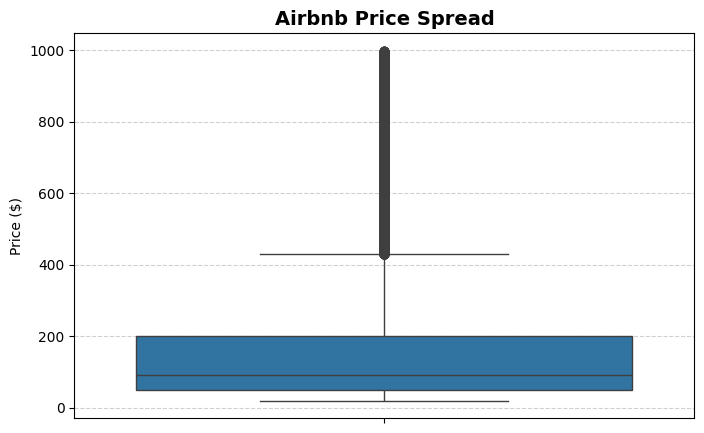

Summary Statistics for Airbnb Prices:

count    123061.000000
mean        184.362159
std         215.872531
min          20.000000
25%          50.000000
50%          91.000000
75%         202.000000
max         999.000000
Name: Price, dtype: float64


In [66]:
# --- Step 1: Plot Price Distribution with Outliers ---
plt.figure(figsize=(8, 5))
sns.boxplot(y=airbnb["Price"], showfliers=True)
plt.title("Airbnb Price Spread", fontsize=14, fontweight="bold")
plt.ylabel("Price ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- Step 2: Descriptive Statistics ---
print("Summary Statistics for Airbnb Prices:\n")
print(airbnb["Price"].describe())

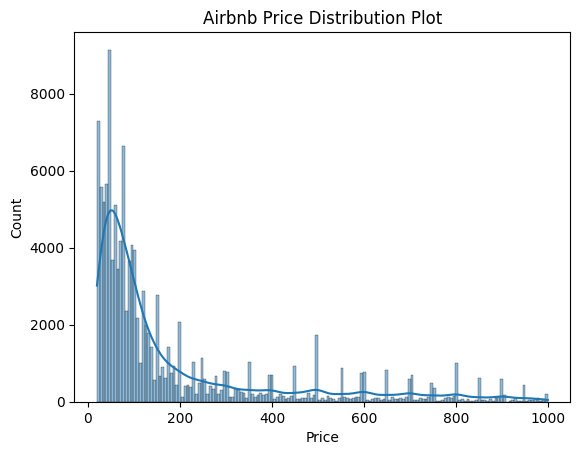

In [67]:
plt.title('Airbnb Price Distribution Plot')
sns.histplot(airbnb.Price, kde=True)
plt.show()

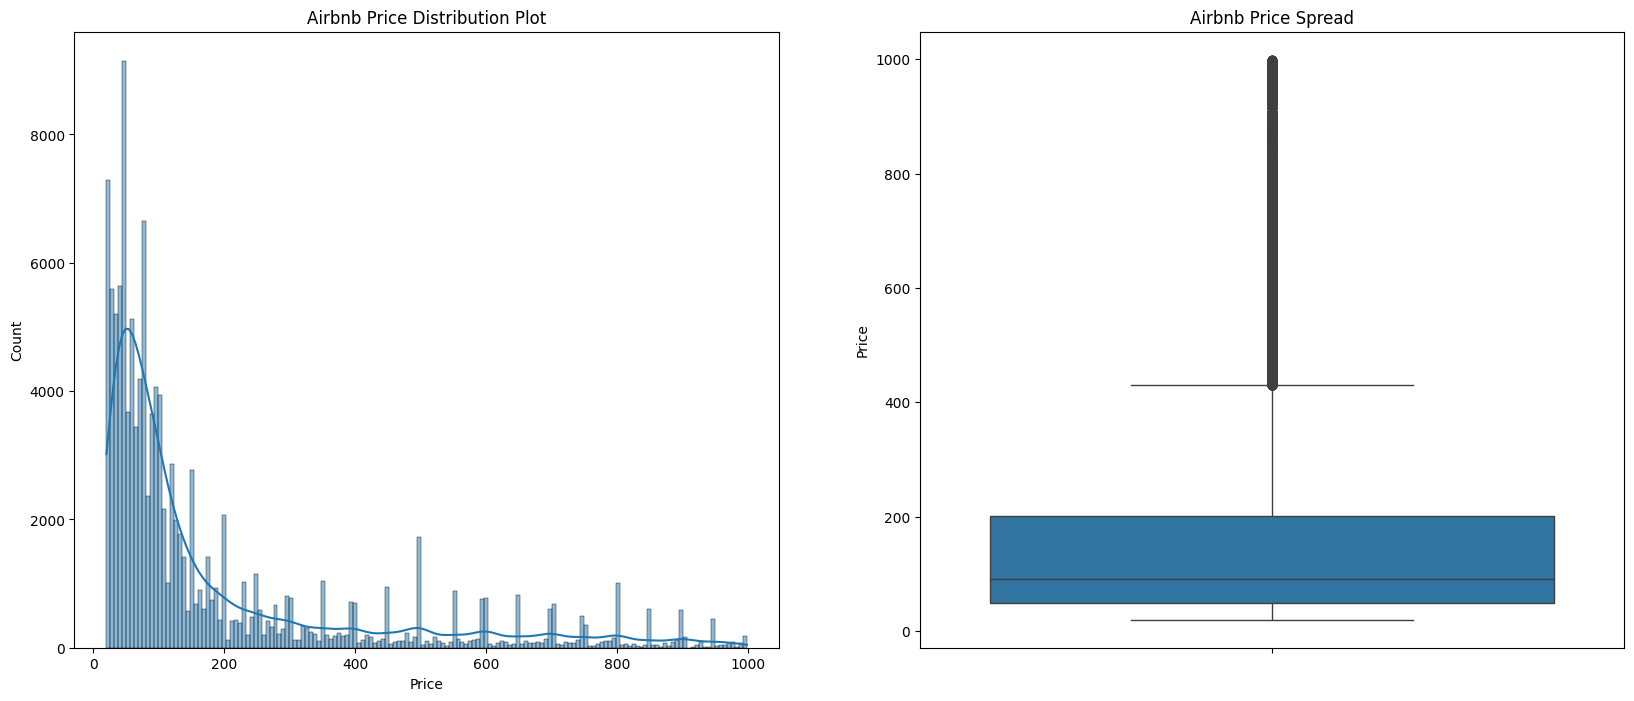

count    123061.000000
mean        184.362159
std         215.872531
min          20.000000
25%          50.000000
50%          91.000000
75%         202.000000
max         999.000000
Name: Price, dtype: float64


In [68]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Airbnb Price Distribution Plot')
sns.histplot(airbnb.Price, kde=True)

plt.subplot(1,2,2)
plt.title('Airbnb Price Spread')
sns.boxplot(y=airbnb.Price, showfliers=True)

plt.show()

print(airbnb.Price.describe())

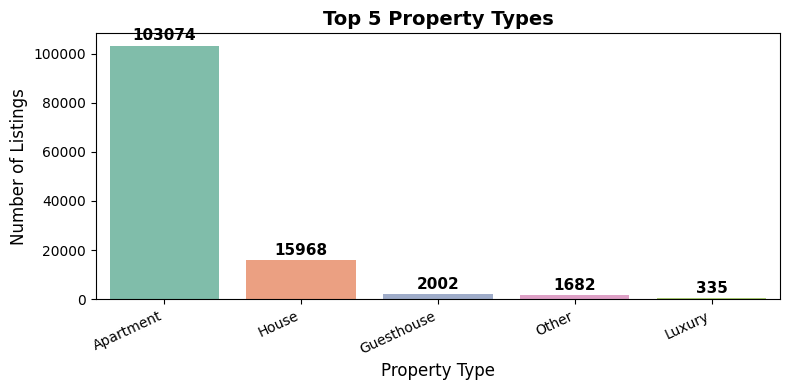

In [69]:
# --- Top 5 Property Types ---
prop = airbnb["Property Type"].value_counts().head(5)

plt.figure(figsize=(8,4))
sns.barplot(x=prop.index, y=prop.values, palette="Set2", alpha=0.9)

# --- Title & labels ---
plt.title("Top 5 Property Types", fontsize=14, weight='bold')
plt.ylabel("Number of Listings", fontsize=12)
plt.xlabel("Property Type", fontsize=12)
plt.xticks(rotation=25, ha='right')

# --- Add count labels on bars ---
for i, val in enumerate(prop.values):
    plt.text(i, val + (max(prop.values) * 0.01), f"{int(val)}", 
             ha='center', va='bottom', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

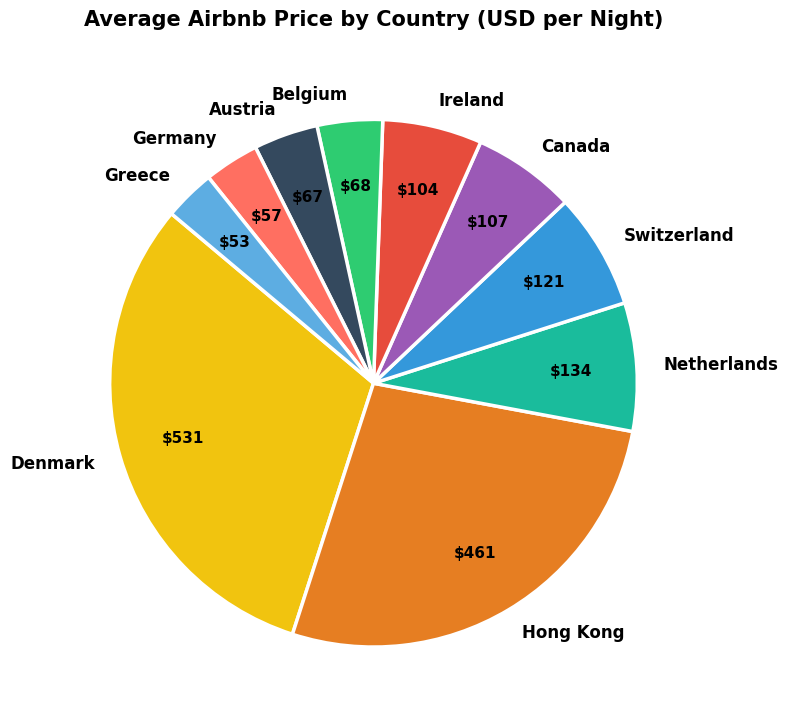

In [70]:
# --- Step 1: Group mean price by country (for selected 10) ---
target_countries = [
    "Netherlands", "Greece", "Germany", "Belgium", "Canada",
    "Austria", "Denmark", "Hong Kong", "Switzerland", "Ireland"
]
country_price = (
    airbnb[airbnb["Country"].isin(target_countries)]
    .groupby("Country")["Price"]
    .mean()
    .sort_values(ascending=False)
)

# --- Step 2: Define distinct color palette ---
colors = [
    "#F1C40F", "#E67E22", "#1ABC9C", "#3498DB", "#9B59B6",
    "#E74C3C", "#2ECC71", "#34495E", "#FF6F61", "#5DADE2"
]

# --- Step 3: Create pie chart ---
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    country_price,
    labels=country_price.index,
    colors=colors[:len(country_price)],
    autopct=lambda p: f"${(p/100)*country_price.sum():,.0f}",
    startangle=140,
    pctdistance=0.75,
    textprops={"fontsize": 12, "color": "black"},
    wedgeprops={"edgecolor": "white", "linewidth": 2.5}
)

# --- Step 4: Format labels and values ---
plt.setp(texts, fontweight="bold")
for i, t in enumerate(autotexts):
    t.set_color("black")
    t.set_fontsize(11)
    t.set_fontweight("bold")

# --- Step 5: Add title & layout ---
plt.title(
    "Average Airbnb Price by Country (USD per Night)",
    fontsize=15,
    weight="bold",
    pad=20
)
plt.tight_layout()
plt.show()

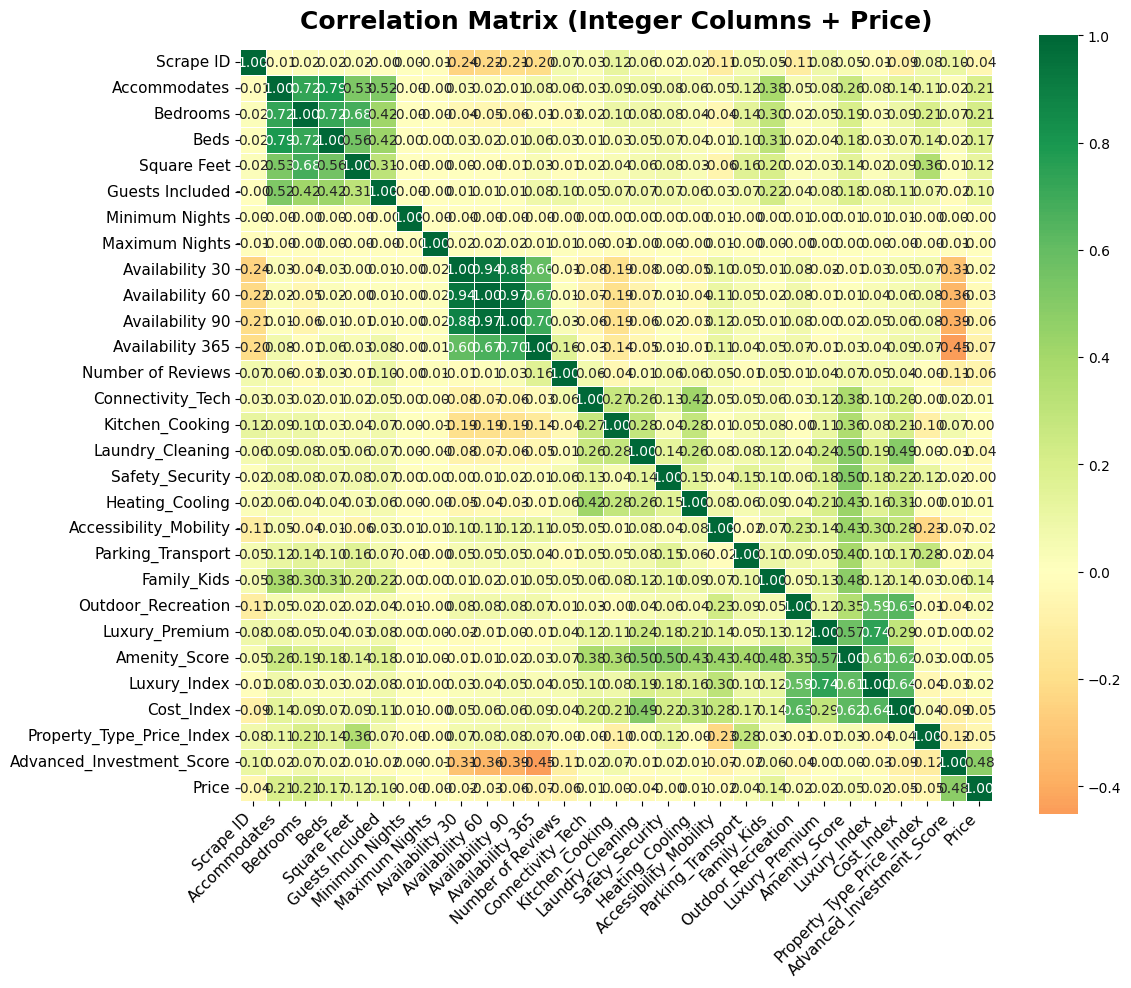

In [71]:
# --- Step 1: Select only int64 columns and include Price ---
int_df = airbnb.select_dtypes(include=["int64"])
int_df = pd.concat([int_df, airbnb["Price"]], axis=1)

# --- Step 2: Compute correlation matrix ---
corrmat = int_df.corr()

# --- Step 3: Plot  heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(
    corrmat,
    annot=True,
    cmap="RdYlGn",
    fmt=".2f",
    linewidths=0.5,
    cbar=True,
    square=True,
    center=0
)

plt.title("Correlation Matrix (Integer Columns + Price)", fontsize=18, weight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

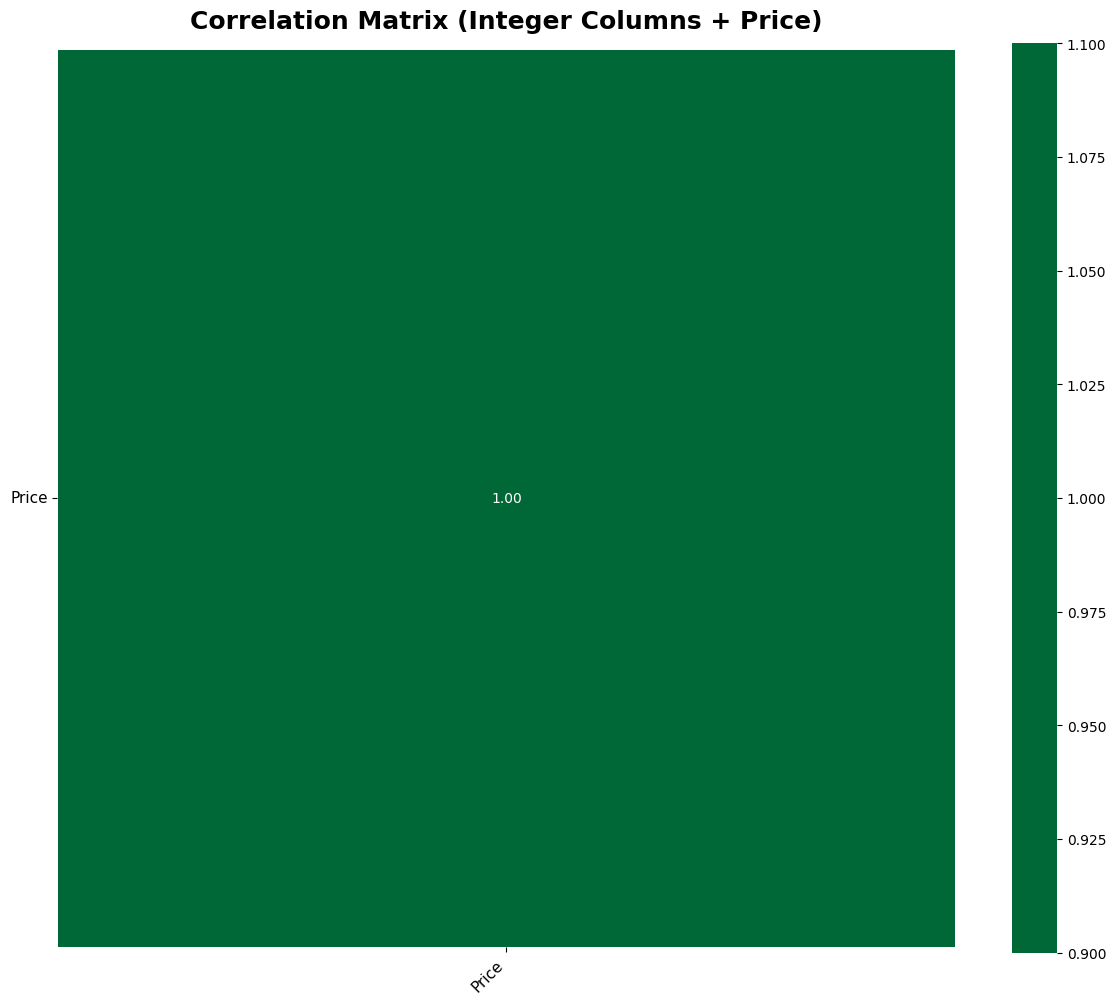

In [72]:
# --- Step 1: Select only int64 columns and include Price ---
int_df = airbnb.select_dtypes(include=["int32"])
int_df = pd.concat([int_df, airbnb["Price"]], axis=1)

# --- Step 2: Compute correlation matrix ---
corrmat = int_df.corr()

# --- Step 3: Plot  heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(
    corrmat,
    annot=True,
    cmap="RdYlGn",
    fmt=".2f",
    linewidths=0.5,
    cbar=True,
    square=True,
    center=0
)

plt.title("Correlation Matrix (Integer Columns + Price)", fontsize=18, weight="bold", pad=15)
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

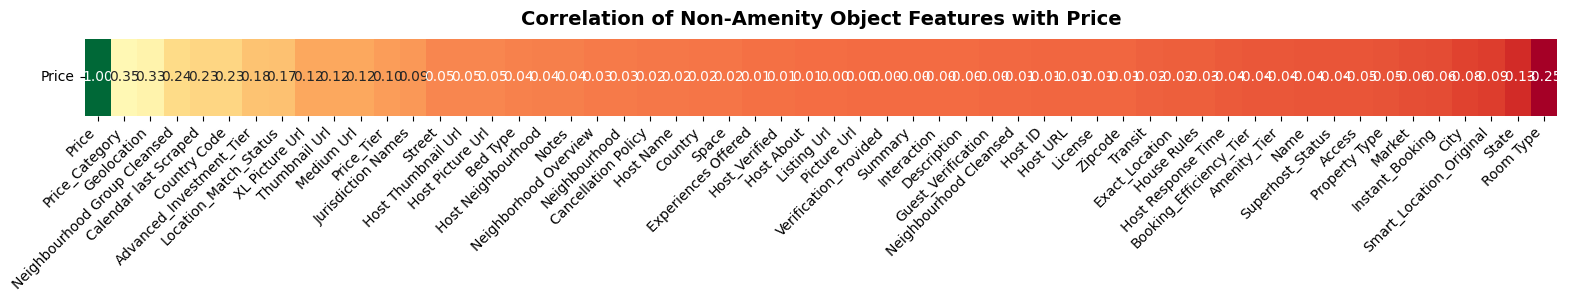

In [73]:
# --- Step 1: Encode non-amenity object columns ---
# (Exclude 'Amenities' and any similar list-like column)
obj_cols = [
    c for c in airbnb.select_dtypes(include='object').columns
    if 'amenities' not in c.lower()
]

# Convert categorical to numeric safely using Label Encoding
from sklearn.preprocessing import LabelEncoder
encoded = airbnb[obj_cols].copy()
for c in encoded.columns:
    encoded[c] = LabelEncoder().fit_transform(encoded[c].astype(str))

# --- Step 2: Combine with Price ---
encoded["Price"] = airbnb["Price"]

# --- Step 3: Compute correlation ---
corr = encoded.corr()[["Price"]].sort_values(by="Price", ascending=False)

# --- Step 4: Plot one-row horizontal heatmap (like cars example) ---
plt.figure(figsize=(19, 1))
sns.heatmap(
    corr.T,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",
    cbar=False
)
plt.title("Correlation of Non-Amenity Object Features with Price", fontsize=14, weight="bold", pad=10)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Top 5 profitable countries

In [81]:
import pandas as pd

def get_top_profitable_countries(df, n=10):
    """
    Given a cleaned Airbnb DataFrame with at least:
      - Country
      - Gross_Profit
      - Profit_Margin_Percent
      - Occupancy_Rate
      - ID (unique listing id)
    returns a summary table of the Top n profitable countries.
    """

    # 1. Group by country and calculate key averages + listing count
    country_summary = (
        df.groupby("Country", as_index=False)
          .agg(
              avg_gross_profit=("Gross_Profit", "mean"),
              avg_profit_margin=("Profit_Margin_Percent", "mean"),
              avg_occupancy=("Occupancy_Rate", "mean"),
              listings=("ID", "count")
          )
    )

    # 2. Build a Country_Profitability_Score using ranks so units are comparable
    #    - 50%: profit margin
    #    - 30%: gross profit
    #    - 20%: occupancy rate
    country_summary["Country_Profitability_Score"] = (
        country_summary["avg_profit_margin"].rank(pct=True) * 0.50 +
        country_summary["avg_gross_profit"].rank(pct=True)  * 0.30 +
        country_summary["avg_occupancy"].rank(pct=True)     * 0.20
    )

    # 3. Sort by score and keep top n
    top_n = (
        country_summary
        .sort_values("Country_Profitability_Score", ascending=False)
        .head(n)
        .reset_index(drop=True)
    )

    return top_n


In [82]:
top_10_countries = get_top_profitable_countries(airbnb, n=10)
top_10_countries


,Country,avg_gross_profit,avg_profit_margin,avg_occupancy,listings,Country_Profitability_Score
0,Ireland,-34391.320460,541.775762,61.832935,6729,0.77
1,Belgium,-38638.449211,2218.469775,53.257804,7419,0.75
2,Austria,-33201.380919,283.075591,53.207091,7893,0.64
3,Denmark,54925.933336,20.544613,75.816402,20545,0.63
4,Canada,-47087.678827,285.486457,53.781760,30787,0.61
5,Netherlands,-2404.572739,-55.331570,77.141076,15181,0.52
6,Germany,-21214.631827,7.605487,71.313056,20576,0.50
7,Switzerland,-60650.248882,235.263448,45.809626,2381,0.42
8,Greece,-41316.823257,191.659865,31.882639,5127,0.39
9,Hong Kong,-151570.489783,81.092969,39.332451,6423,0.27


# Simple version (if you don’t have Gross_Profit yet)

In [83]:
def get_top_profitable_countries_simple(df, n=10):
    """
    Simpler version using only Profit_Margin_Percent and Occupancy_Rate.
    """

    country_summary = (
        df.groupby("Country", as_index=False)
          .agg(
              avg_profit_margin=("Profit_Margin_Percent", "mean"),
              avg_occupancy=("Occupancy_Rate", "mean"),
              listings=("ID", "count")
          )
    )

    # 70% weight on profit margin, 30% on occupancy
    country_summary["Country_Profitability_Score"] = (
        country_summary["avg_profit_margin"].rank(pct=True) * 0.70 +
        country_summary["avg_occupancy"].rank(pct=True)     * 0.30
    )

    top_n = (
        country_summary
        .sort_values("Country_Profitability_Score", ascending=False)
        .head(n)
        .reset_index(drop=True)
    )

    return top_n


In [84]:
top_10_countries = get_top_profitable_countries_simple(airbnb, n=10)
top_10_countries


,Country,avg_profit_margin,avg_occupancy,listings,Country_Profitability_Score
0,Belgium,2218.469775,53.257804,7419,0.85
1,Ireland,541.775762,61.832935,6729,0.84
2,Canada,285.486457,53.781760,30787,0.74
3,Austria,283.075591,53.207091,7893,0.61
4,Switzerland,235.263448,45.809626,2381,0.51
5,Denmark,20.544613,75.816402,20545,0.48
6,Greece,191.659865,31.882639,5127,0.38
7,Germany,7.605487,71.313056,20576,0.38
8,Netherlands,-55.331570,77.141076,15181,0.37
9,Hong Kong,81.092969,39.332451,6423,0.34


In [85]:
top_10_countries.to_csv("top_10_profitable_countries.csv", index=False)


In [ ]:
airbnb.to_excel("airbnb_cleaned.xlsx", sheet_name='Cleaned', index=False)